In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

### Load Dataset

In [2]:
file_path = "Final_dataset.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head()

year_range   Crop  Punjab Area  Punjab Production  Punjab Yield  Sindh Area  \
0    2001-02  apple         0.74                2.5         84.31        0.25   
1    2002-03  apple         0.99                3.6         91.05        0.25   
2    2003-04  apple         0.99                3.6         91.05        0.25   
3    2004-05  apple         0.99                3.6         91.05        0.00   
4    2005-06  apple         0.99                3.6         91.05        0.00   

   Sindh Production  Sindh Yield  Khyber Pakhtoonkhaw Area  \
0               0.2        20.23                     23.48   
1               0.1        10.12                     22.24   
2               0.1        10.12                     21.75   
3               0.1         0.00                     22.98   
4               0.1         0.00                     22.98   

   Khyber Pakhtoonkhaw Production  ...  Balochistan Area  \
0                           117.4  ...             95.88   
1                           110.1  ...             93.90   
2                           106.3  ...            250.82   
3                           127.9  ...            251.81   
4                           126.7  ...            252.79   

   Balochistan Production  Balochistan Yield  Pakistan Area  \
0                   247.0              64.40         120.34   
1                   201.6              53.67         117.38   
2                   223.8              22.31         273.80   
3                   220.3              21.87         275.77   
4                   220.9              21.85         276.76   

   Pakistan Production  Pakistan Yield  Export Quantity  Export Value  \
0                367.1          293.96            0.818        18.359   
1                315.4          278.60            0.250         4.553   
2                333.8          245.69            0.097         3.492   
3                351.9          252.06            0.100         3.649   
4                351.3          250.73            0.146         3.539   

   Import Quantity  Import Value  
0         2.439837        24.937  
1         3.830687        39.738  
2         4.478577        42.844  
3         0.813978        11.843  
4         7.562918        80.389  

[5 rows x 21 columns]

In [4]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (286, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year_range                      286 non-null    object 
 1   Crop                            286 non-null    object 
 2   Punjab Area                     286 non-null    float64
 3   Punjab Production               286 non-null    float64
 4   Punjab Yield                    286 non-null    float64
 5   Sindh Area                      286 non-null    float64
 6   Sindh Production                286 non-null    float64
 7   Sindh Yield                     286 non-null    float64
 8   Khyber Pakhtoonkhaw Area        286 non-null    float64
 9   Khyber Pakhtoonkhaw Production  286 non-null    float64
 10  Khyber Pakhtoonkhaw Yield       286 non-null    float64
 11  Balochistan Area                286 non-null    float64
 

In [5]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [6]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
year_range                        0
Crop                              0
Punjab Area                       0
Punjab Production                 0
Punjab Yield                      0
Sindh Area                        0
Sindh Production                  0
Sindh Yield                       0
Khyber Pakhtoonkhaw Area          0
Khyber Pakhtoonkhaw Production    0
Khyber Pakhtoonkhaw Yield         0
Balochistan Area                  0
Balochistan Production            0
Balochistan Yield                 0
Pakistan Area                     0
Pakistan Production               0
Pakistan Yield                    0
Export Quantity                   0
Export Value                      0
Import Quantity                   0
Import Value                      0
dtype: int64


In [7]:
print("Data Types:")
print(df.dtypes)

Data Types:
year_range                         object
Crop                               object
Punjab Area                       float64
Punjab Production                 float64
Punjab Yield                      float64
Sindh Area                        float64
Sindh Production                  float64
Sindh Yield                       float64
Khyber Pakhtoonkhaw Area          float64
Khyber Pakhtoonkhaw Production    float64
Khyber Pakhtoonkhaw Yield         float64
Balochistan Area                  float64
Balochistan Production            float64
Balochistan Yield                 float64
Pakistan Area                     float64
Pakistan Production               float64
Pakistan Yield                    float64
Export Quantity                   float64
Export Value                      float64
Import Quantity                   float64
Import Value                      float64
dtype: object


In [8]:
df["Start_Year"] = df["year_range"].apply(lambda x: int(x.split("-")[0]))

In [9]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Punjab Area  Punjab Production  Punjab Yield   Sindh Area  \
count    286.000000         286.000000    286.000000   286.000000   
mean    2208.507308        5465.047517    115.414685   515.987937   
std     4428.869862       12081.236223    149.376546   808.972274   
min        0.000000           0.000000      0.000000     0.000000   
25%        3.710000          10.225000     24.930000     0.907500   
50%       95.505000         330.430000     75.285000    83.275000   
75%     1914.265000        3153.582500    130.700000   725.947500   
max    17250.750000       66932.000000    747.730000  3059.780000   

       Sindh Production  Sindh Yield  Khyber Pakhtoonkhaw Area  \
count        286.000000   286.000000                286.000000   
mean        1779.352203    87.704336                181.679126   
std         4185.371215   149.993142                487.086736   
min            0.000000     0.000000                  0.040000   
25%            2.925000    

In [10]:
numeric_columns = df.select_dtypes(include=["float64"]).columns

for col in numeric_columns:
    if (df[col] < 0).any():
        print(f"Negative values found in {col}")
        df = df[df[col] >= 0]

print("\nData cleaning completed successfully!")


Data cleaning completed successfully!


#### Total Area, Production, and Yield across 4 provinces

In [11]:
df['Total_Provincial_Area'] = (
    df['Punjab Area'] + df['Sindh Area'] +
    df['Khyber Pakhtoonkhaw Area'] + df['Balochistan Area']
)

df['Total_Provincial_Production'] = (
    df['Punjab Production'] + df['Sindh Production'] +
    df['Khyber Pakhtoonkhaw Production'] + df['Balochistan Production']
)

df['Average_Provincial_Yield'] = (
    df['Punjab Yield'] + df['Sindh Yield'] +
    df['Khyber Pakhtoonkhaw Yield'] + df['Balochistan Yield']
) / 4

#### Yield per hectare for validation (recompute to compare with Pakistan Yield)

In [12]:
df['Calculated_Yield'] = df['Total_Provincial_Production'] / df['Total_Provincial_Area']

#### Identify dominant region in production per row

In [13]:
def get_dominant_province(row):
    provinces = {
        'Punjab': row['Punjab Production'],
        'Sindh': row['Sindh Production'],
        'KPK': row['Khyber Pakhtoonkhaw Production'],
        'Balochistan': row['Balochistan Production']
    }
    return max(provinces, key=provinces.get)

df['Top_Producing_Province'] = df.apply(get_dominant_province, axis=1)

#### Preview new features

In [14]:
print(df[['year_range', 'Crop', 'Total_Provincial_Area', 'Total_Provincial_Production',
          'Calculated_Yield', 'Pakistan Yield', 'Top_Producing_Province']].head())

  year_range   Crop  Total_Provincial_Area  Total_Provincial_Production  \
0    2001-02  apple                 120.35                        367.1   
1    2002-03  apple                 117.38                        315.4   
2    2003-04  apple                 273.81                        333.8   
3    2004-05  apple                 275.78                        351.9   
4    2005-06  apple                 276.76                        351.3   

   Calculated_Yield  Pakistan Yield Top_Producing_Province  
0          3.050270          293.96            Balochistan  
1          2.686999          278.60            Balochistan  
2          1.219094          245.69            Balochistan  
3          1.276017          252.06            Balochistan  
4          1.269331          250.73            Balochistan  


#### Print Available sheets name

In [15]:
sheet_names = pd.ExcelFile(file_path).sheet_names
print("Available sheets in the Excel file:")
print(sheet_names)

Available sheets in the Excel file:
['Economy Data', 'production|yield', 'Area|production', 'Yield|Area', 'Climate Data - Original sheet', 'Climate Data', 'Economy with Climate Index', 'production|climate index', 'yield|climate index', 'remaining data']


Proceeding with the **Climate Data - Original Sheet** 

In [16]:
climate_df = pd.read_excel(file_path, sheet_name='Climate Data - Original sheet')
climate_df.head()


year_month Sindh_Region  Sindh_temperature_2m_max  Sindh_temperature_2m_min  \
0    2001-01        Sindh                     23.25                     10.33   
1    2001-02        Sindh                     27.75                     13.61   
2    2001-03        Sindh                     32.97                     18.29   
3    2001-04        Sindh                     38.67                     22.86   
4    2001-05        Sindh                     42.22                     26.90   

   Sindh_temperature_2m_mean  Sindh_Combined_temperature_normalized  \
0                      16.96                                   0.08   
1                      20.96                                   0.26   
2                      26.25                                   0.50   
3                      31.29                                   0.75   
4                      34.12                                   0.91   

   Sindh_precipitation_sum  Sindh_precipitation_sum_normalized  \
0                      0.0                                 0.0   
1                      0.0                                 0.0   
2                      0.4                                 0.0   
3                      1.6                                 0.0   
4                      0.0                                 0.0   

   Sindh_shortwave_radiation  Sindh_shortwave_radiation_normalized  ...  \
0                      17.29                                  0.23  ...   
1                      20.09                                  0.43  ...   
2                      23.35                                  0.66  ...   
3                      26.38                                  0.87  ...   
4                      27.67                                  0.96  ...   

   Balochistan_wind_speed_10m_max_normalized  Balochistan_wind_gusts_10m_max  \
0                                       0.25                            52.9   
1                                       0.55                            61.6   
2                                       0.54                            59.4   
3                                       0.60                            50.4   
4                                       0.68                            48.6   

   Balochistan_wind_gusts_10m_max_normalized  \
0                                       0.27   
1                                       0.39   
2                                       0.36   
3                                       0.23   
4                                       0.21   

   Balochistan_wind_direction_10m_dominant  \
0                                   118.00   
1                                   148.32   
2                                   150.81   
3                                   238.60   
4                                   299.65   

   Balochistan_wind_direction_10m_dominant_normalized  \
0                                               0.34    
1                                               0.44    
2                                               0.45    
3                                               0.74    
4                                               0.94    

   Balochistan_fao_evapotranspiration  \
0                                2.94   
1                                3.62   
2                                5.15   
3                                7.04   
4                                8.77   

   Balochistan_fao_evapotranspiration_normalized  \
0                                           0.17   
1                                           0.26   
2                                           0.47   
3                                           0.73   
4                                           0.96   

   Balochistan_precipitation_hours  \
0                               14   
1                               37   
2                               21   
3                               10   
4                                0   

   Balochistan_precipitation_hours_normalized  Balochistan_Cl

#### Inspect and Clean Climate Data Sheet

In [17]:
print("=== Column Names ===")
print(climate_df.columns)

=== Column Names ===
Index(['year_month', 'Sindh_Region', 'Sindh_temperature_2m_max',
       'Sindh_temperature_2m_min', 'Sindh_temperature_2m_mean',
       'Sindh_Combined_temperature_normalized', 'Sindh_precipitation_sum',
       'Sindh_precipitation_sum_normalized', 'Sindh_shortwave_radiation',
       'Sindh_shortwave_radiation_normalized', 'Sindh_rain_sum',
       'Sindh_rain_sum_normalized', 'Sindh_wind_speed_10m_max',
       'Sindh_wind_speed_10m_max_normalized', 'Sindh_wind_gusts_10m_max',
       'Sindh_wind_gusts_10m_max_normalized',
       'Sindh_wind_direction_10m_dominant',
       'Sindh_wind_direction_10m_dominant_normalized',
       'Sindh_fao_evapotranspiration',
       'Sindh_fao_evapotranspiration_normalized', 'Sindh_precipitation_hours',
       'Sindh_precipitation_hours_normalized', 'Sindh_Climate_Index',
       'Punjab_Region', 'Punjab_temperature_2m_max',
       'Punjab_temperature_2m_min', 'Punjab_temperature_2m_mean',
       'Punjab_Combined_temperature_normalized

In [18]:
print("\n=== Info ===")
print(climate_df.info())


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 89 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   year_month                                          292 non-null    object 
 1   Sindh_Region                                        292 non-null    object 
 2   Sindh_temperature_2m_max                            292 non-null    float64
 3   Sindh_temperature_2m_min                            292 non-null    float64
 4   Sindh_temperature_2m_mean                           292 non-null    float64
 5   Sindh_Combined_temperature_normalized               292 non-null    float64
 6   Sindh_precipitation_sum                             292 non-null    float64
 7   Sindh_precipitation_sum_normalized                  292 non-null    float64
 8   Sindh_shortwave_radiation                           292 non-null  

In [19]:
print("\n=== Missing Values ===")
print(climate_df.isnull().sum())


=== Missing Values ===
year_month                                       0
Sindh_Region                                     0
Sindh_temperature_2m_max                         0
Sindh_temperature_2m_min                         0
Sindh_temperature_2m_mean                        0
                                                ..
Balochistan_fao_evapotranspiration               0
Balochistan_fao_evapotranspiration_normalized    0
Balochistan_precipitation_hours                  0
Balochistan_precipitation_hours_normalized       0
Balochistan_Climate_Index                        0
Length: 89, dtype: int64


##### Aggregate Monthly Climate Data to Yearly by Province

##### Extract year from year_month

In [20]:
climate_df['Year'] = pd.to_datetime(climate_df['year_month']).dt.year

##### Define list of provinces based on column prefixes

In [21]:
provinces = ['Sindh', 'Punjab', 'Kpk', 'Balochistan']

##### Initialize empty list to collect per-province data

In [22]:
province_dfs = []

#### Combine all provinces into one DataFrame

In [23]:
for province in provinces:
    area_col = f"{province} Area"
    prod_col = f"{province} Production"
    yield_col = f"{province} Yield"
    
    if all(col in df.columns for col in [area_col, prod_col, yield_col]):
        temp_df = df[["year_range", "Crop", area_col, prod_col, yield_col]].copy()
        temp_df.columns = ["Year", "Crop", "Area", "Production", "Yield"]
        temp_df["Province"] = province
        province_dfs.append(temp_df)

# Combine all into final crop_df
if province_dfs:
    crop_df = pd.concat(province_dfs, ignore_index=True)
else:
    print("Warning: province_dfs is empty. No data to concatenate.")
    crop_df = pd.DataFrame()

In [24]:
if province_dfs:
	climate_by_province_year = pd.concat(province_dfs, ignore_index=True)
else:
	print("Warning: province_dfs is empty. No data to concatenate.")
	climate_by_province_year = pd.DataFrame()

##### Preview result

In [25]:
print("✅ Climate data aggregated by province and year:")
print(climate_by_province_year.head())

✅ Climate data aggregated by province and year:
      Year   Crop  Area  Production  Yield Province
0  2001-02  apple  0.25         0.2  20.23    Sindh
1  2002-03  apple  0.25         0.1  10.12    Sindh
2  2003-04  apple  0.25         0.1  10.12    Sindh
3  2004-05  apple  0.00         0.1   0.00    Sindh
4  2005-06  apple  0.00         0.1   0.00    Sindh


##### Merge Climate Data with Economic Indicators by Province and Year

In [26]:
print("=== Economy Columns ===")
print(df.columns.tolist())
crop_df = df.copy()
print(crop_df.columns.tolist())

=== Economy Columns ===
['year_range', 'Crop', 'Punjab Area', 'Punjab Production', 'Punjab Yield', 'Sindh Area', 'Sindh Production', 'Sindh Yield', 'Khyber Pakhtoonkhaw Area', 'Khyber Pakhtoonkhaw Production', 'Khyber Pakhtoonkhaw Yield', 'Balochistan Area', 'Balochistan Production', 'Balochistan Yield', 'Pakistan Area', 'Pakistan Production', 'Pakistan Yield', 'Export Quantity', 'Export Value', 'Import Quantity', 'Import Value', 'Start_Year', 'Total_Provincial_Area', 'Total_Provincial_Production', 'Average_Provincial_Yield', 'Calculated_Yield', 'Top_Producing_Province']
['year_range', 'Crop', 'Punjab Area', 'Punjab Production', 'Punjab Yield', 'Sindh Area', 'Sindh Production', 'Sindh Yield', 'Khyber Pakhtoonkhaw Area', 'Khyber Pakhtoonkhaw Production', 'Khyber Pakhtoonkhaw Yield', 'Balochistan Area', 'Balochistan Production', 'Balochistan Yield', 'Pakistan Area', 'Pakistan Production', 'Pakistan Yield', 'Export Quantity', 'Export Value', 'Import Quantity', 'Import Value', 'Start_Year'

In [27]:
# --- Step 1: Prepare crop_df ---
crop_df["Year"] = crop_df["year_range"].str.extract(r"(\d{4})").astype(int)

provinces = ["Punjab", "Sindh", "Kpk", "Balochistan"]  # Using Kpk to match climate_df column prefix
province_dfs = []

for province in provinces:
    area_col = f"{province} Area"
    prod_col = f"{province} Production"
    yield_col = f"{province} Yield"
    
    if all(col in crop_df.columns for col in [area_col, prod_col, yield_col]):
        df = crop_df[["Year", "Crop", area_col, prod_col, yield_col]].copy()
        df.columns = ["Year", "Crop", "Area", "Production", "Yield"]
        df["Province"] = province
        province_dfs.append(df)

crop_df_clean = pd.concat(province_dfs, ignore_index=True)

# --- Step 2: Prepare climate_df ---
climate_df["Year"] = climate_df["year_month"].str.extract(r"(\d{4})").astype(int)

climate_dfs = []
climate_vars = [
    'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
    'Combined_temperature_normalized', 'precipitation_sum', 'precipitation_sum_normalized',
    'shortwave_radiation', 'shortwave_radiation_normalized',
    'fao_evapotranspiration', 'fao_evapotranspiration_normalized',
    'precipitation_hours', 'precipitation_hours_normalized', 'Climate_Index'
]

for province in provinces:
    # Map province-specific column names
    province_cols = [f"{province}_{var}" for var in climate_vars]
    # Ensure all required columns exist
    if all(col in climate_df.columns for col in province_cols):
        df = climate_df[["Year"] + province_cols].copy()
        # Rename columns to remove province prefix for consistency
        df.columns = ["Year"] + climate_vars
        df["Province"] = province
        climate_dfs.append(df)

climate_clean = pd.concat(climate_dfs, ignore_index=True)

# --- Step 3: Merge both cleaned DataFrames ---
merged_df = pd.merge(crop_df_clean, climate_clean, on=["Year", "Province"], how="inner")


# Save the final merged dataset to CSV
merged_df.to_csv("merged_agri_climate_data.csv", index=False)
print("✅ Merged dataset saved as 'merged_agri_climate_data.csv'")

✅ Merged dataset saved as 'merged_agri_climate_data.csv'


In [34]:
print("🧾 Columns in climate_df:")
for col in climate_df.columns:
    print("-", col)


🧾 Columns in climate_df:
- year_month
- Sindh_Region
- Sindh_temperature_2m_max
- Sindh_temperature_2m_min
- Sindh_temperature_2m_mean
- Sindh_Combined_temperature_normalized
- Sindh_precipitation_sum
- Sindh_precipitation_sum_normalized
- Sindh_shortwave_radiation
- Sindh_shortwave_radiation_normalized
- Sindh_rain_sum
- Sindh_rain_sum_normalized
- Sindh_wind_speed_10m_max
- Sindh_wind_speed_10m_max_normalized
- Sindh_wind_gusts_10m_max
- Sindh_wind_gusts_10m_max_normalized
- Sindh_wind_direction_10m_dominant
- Sindh_wind_direction_10m_dominant_normalized
- Sindh_fao_evapotranspiration
- Sindh_fao_evapotranspiration_normalized
- Sindh_precipitation_hours
- Sindh_precipitation_hours_normalized
- Sindh_Climate_Index
- Punjab_Region
- Punjab_temperature_2m_max
- Punjab_temperature_2m_min
- Punjab_temperature_2m_mean
- Punjab_Combined_temperature_normalized
- Punjab_precipitation_sum
- Punjab_precipitation_sum_normalized
- Punjab_shortwave_radiation
- Punjab_shortwave_radiation_normalized

#### Correlation between yield and temperature

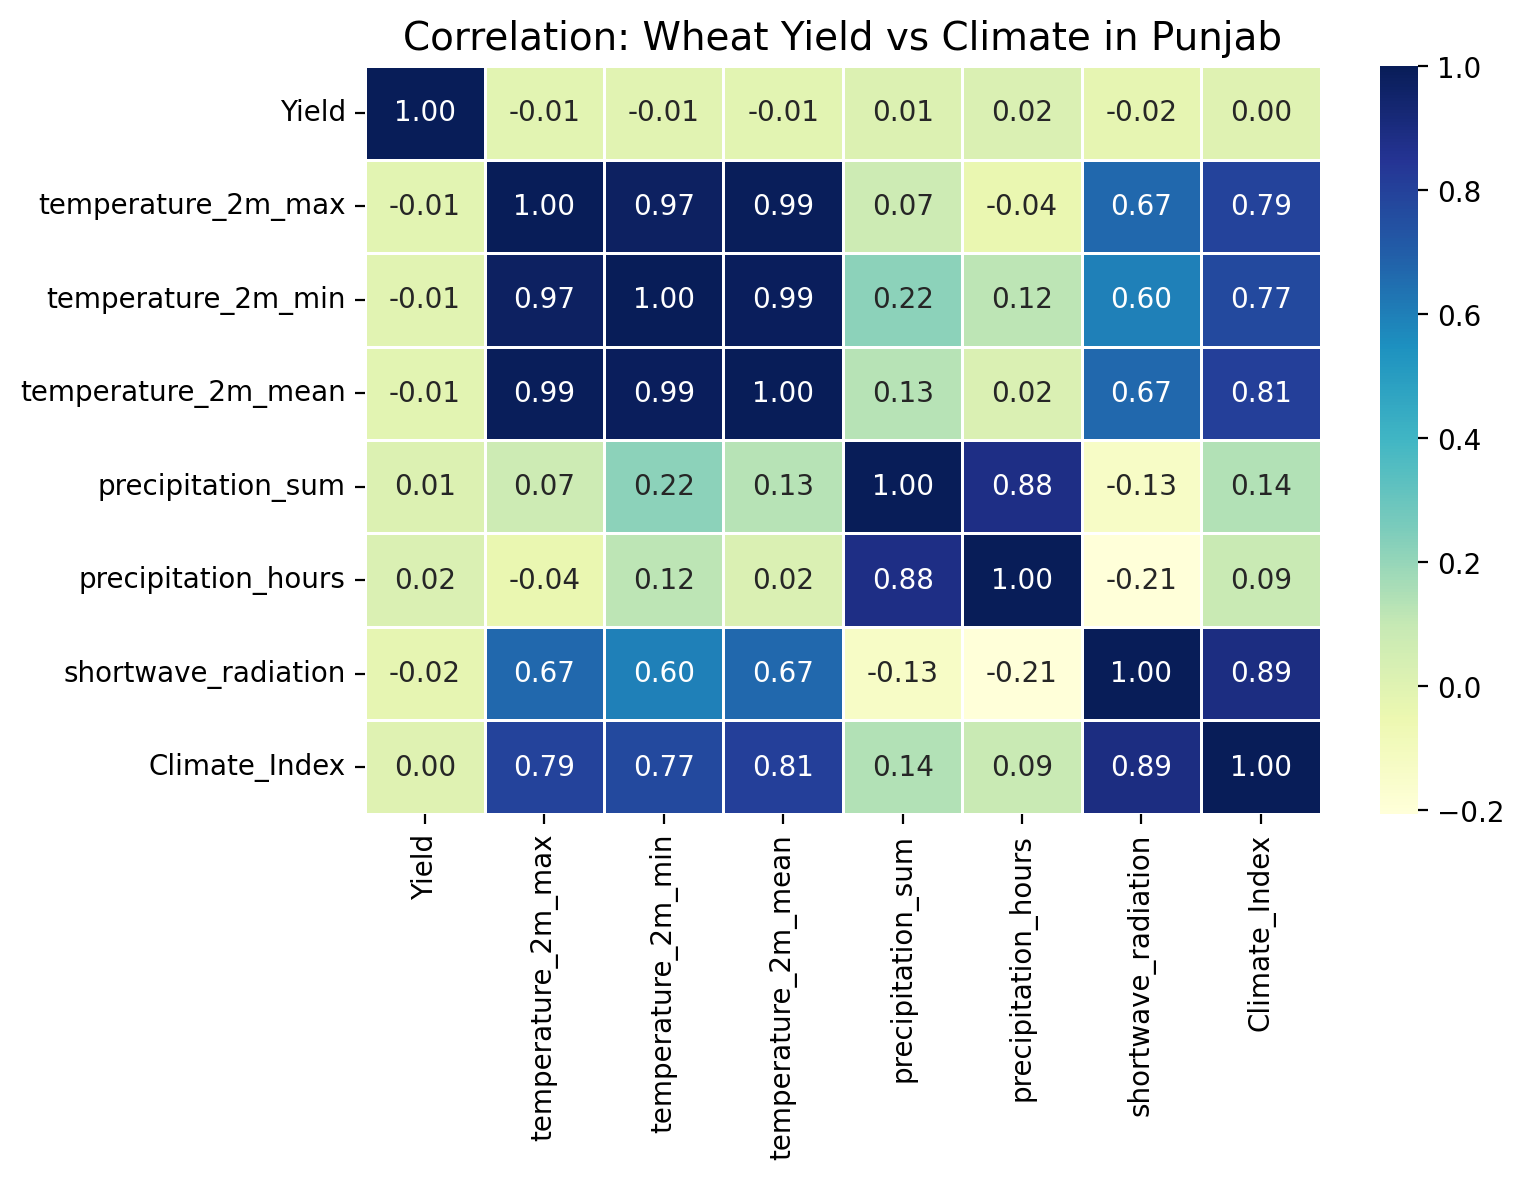

✅ Correlation subset shape: (10296, 8)


In [57]:
focus_crop = "wheat"
focus_province = "Punjab"

# Filter for that crop and province
filtered_df = merged_df[
    (merged_df["Crop"] == focus_crop) & 
    (merged_df["Province"] == focus_province)
].copy()

# List only the key climate variables for Punjab
selected_climate_vars = [
    "temperature_2m_max",
    "temperature_2m_min",
    "temperature_2m_mean",
    "precipitation_sum",
    "precipitation_hours",
    "shortwave_radiation",
    "Climate_Index"
]

# Keep only 'Yield' and the selected climate variables
subset_df = merged_df[["Yield"] + selected_climate_vars].dropna()

# STEP 2: Compute and plot correlation matrix
corr_matrix = subset_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation: {focus_crop.title()} Yield vs Climate in {focus_province}", fontsize=14)
plt.tight_layout()
plt.show()

# Optional preview
print("✅ Correlation subset shape:", subset_df.shape)


#### Plot Yield Trends Over Time

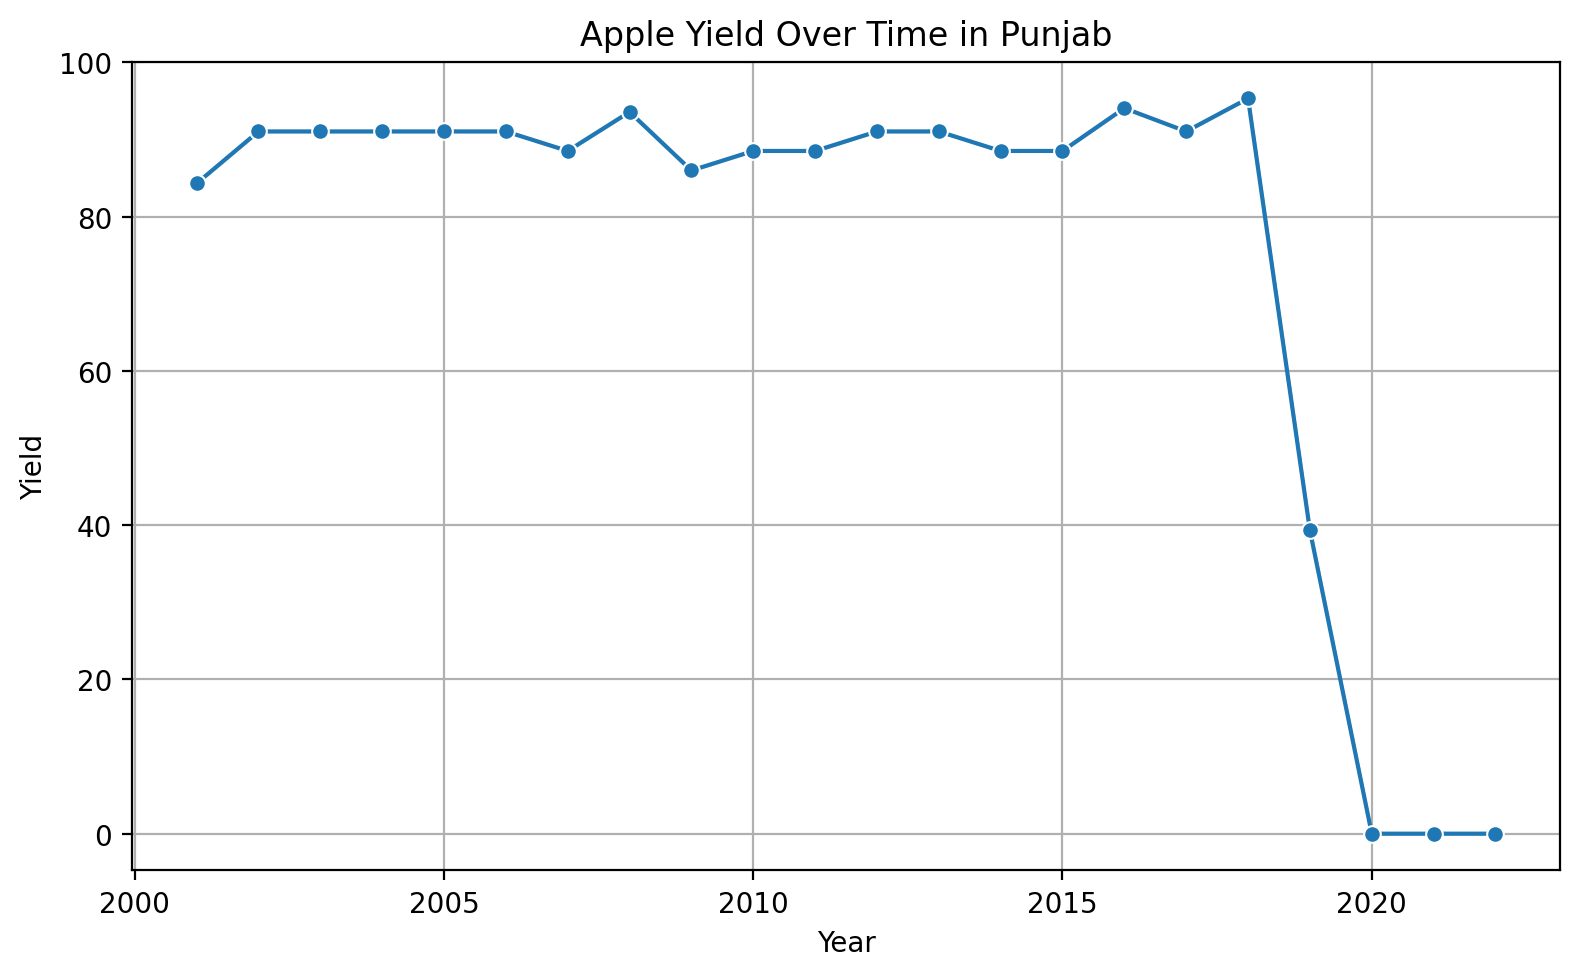

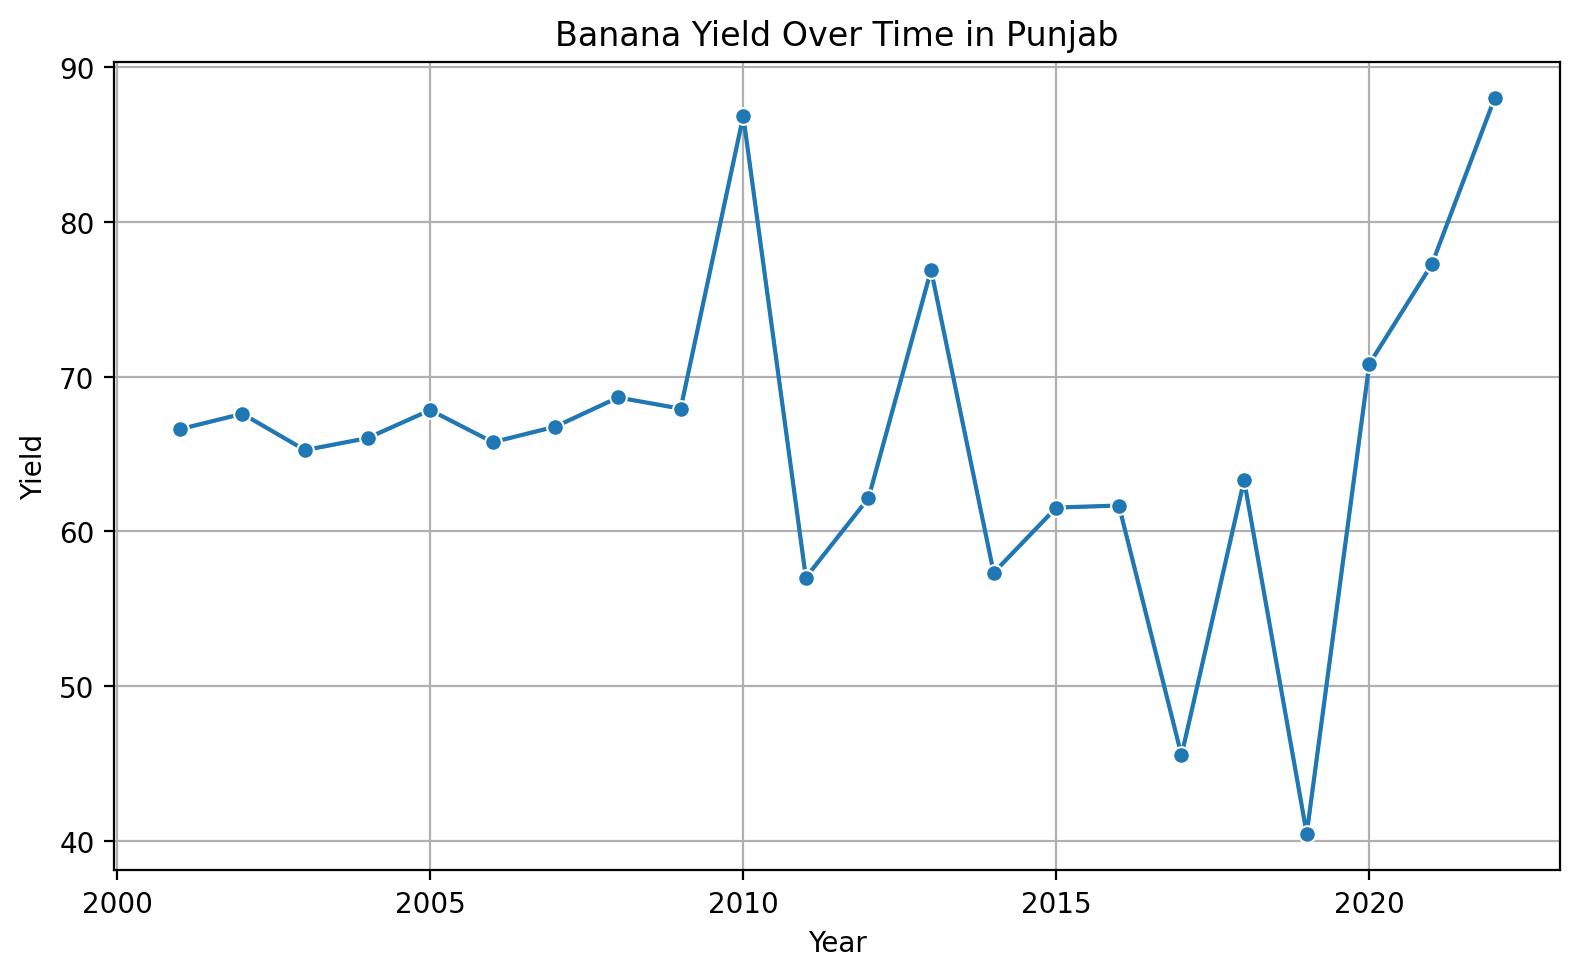

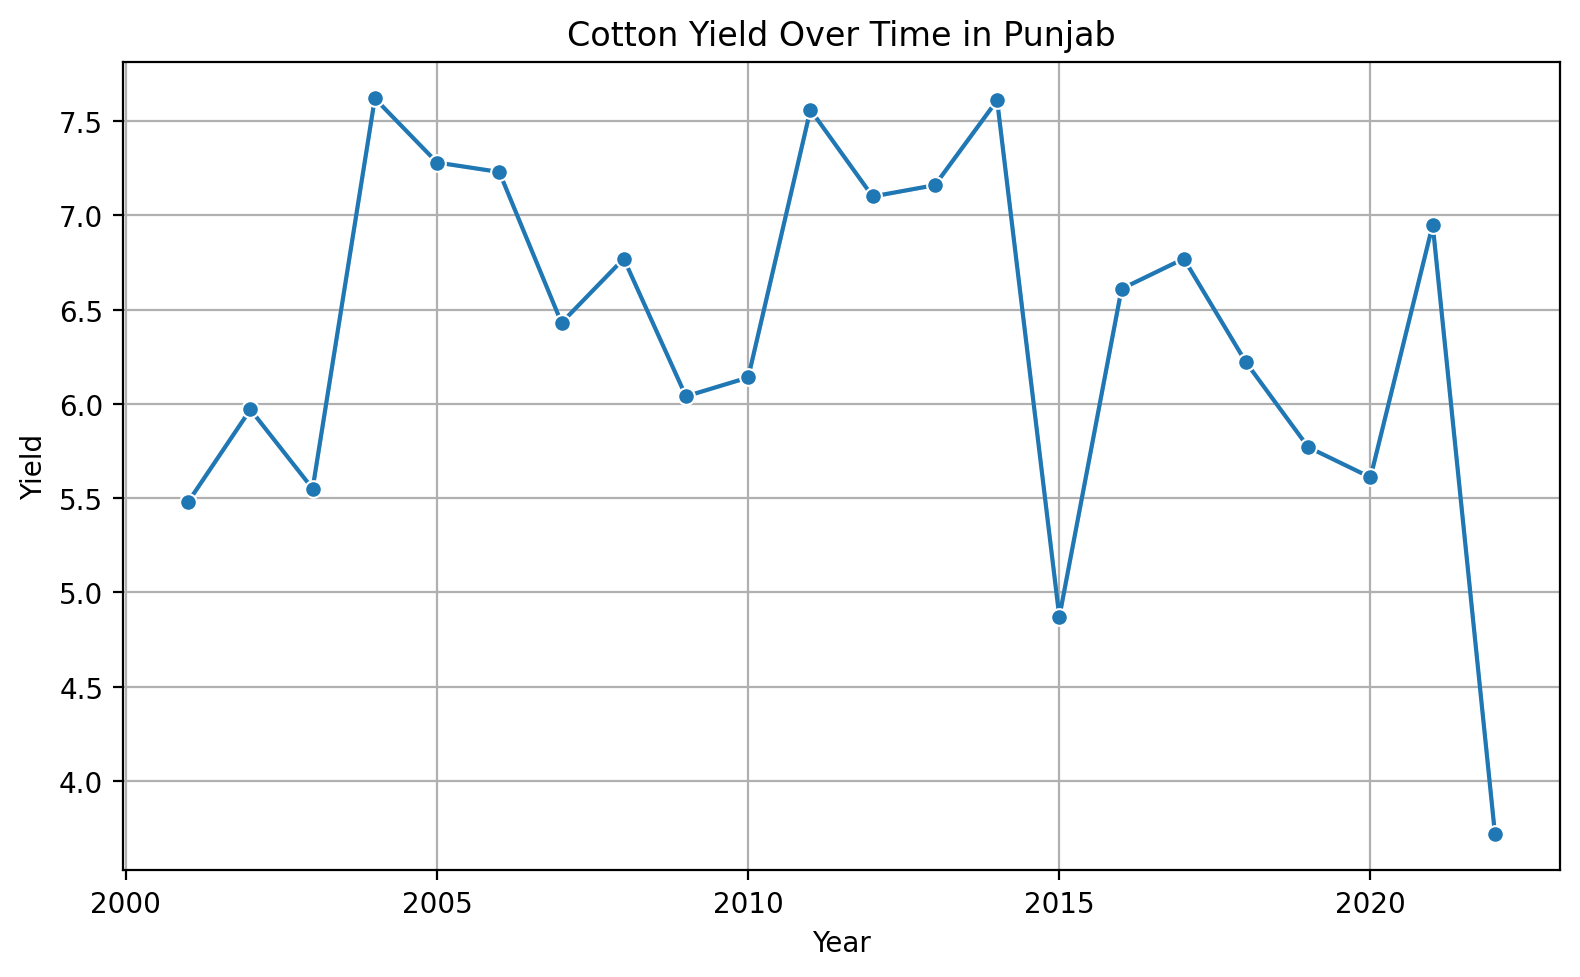

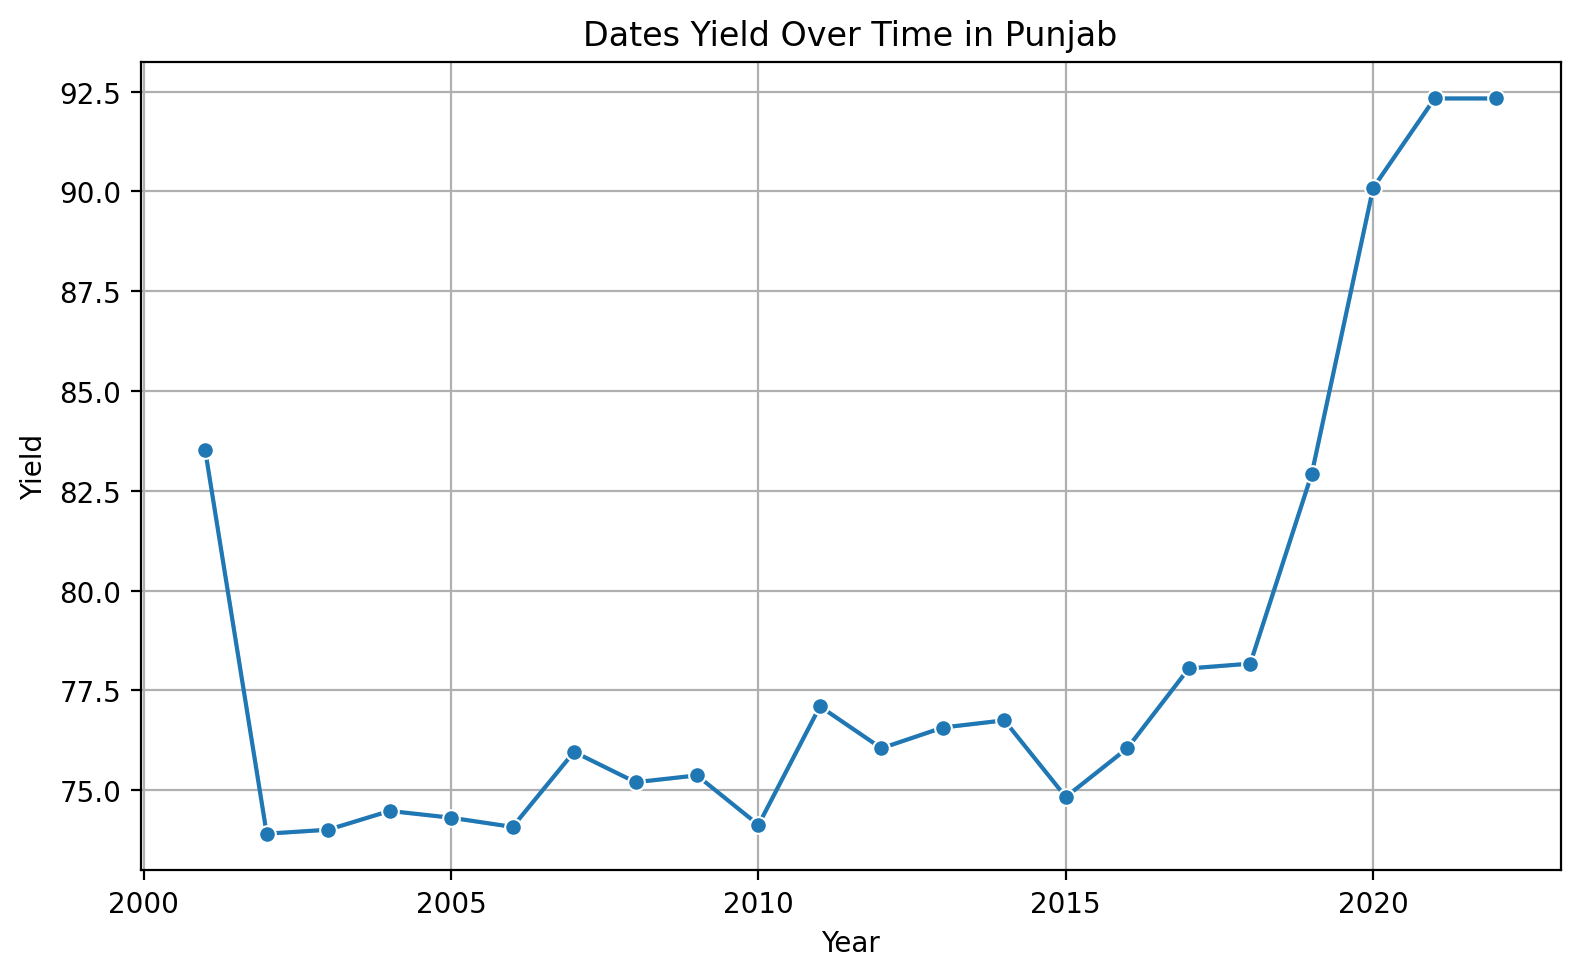

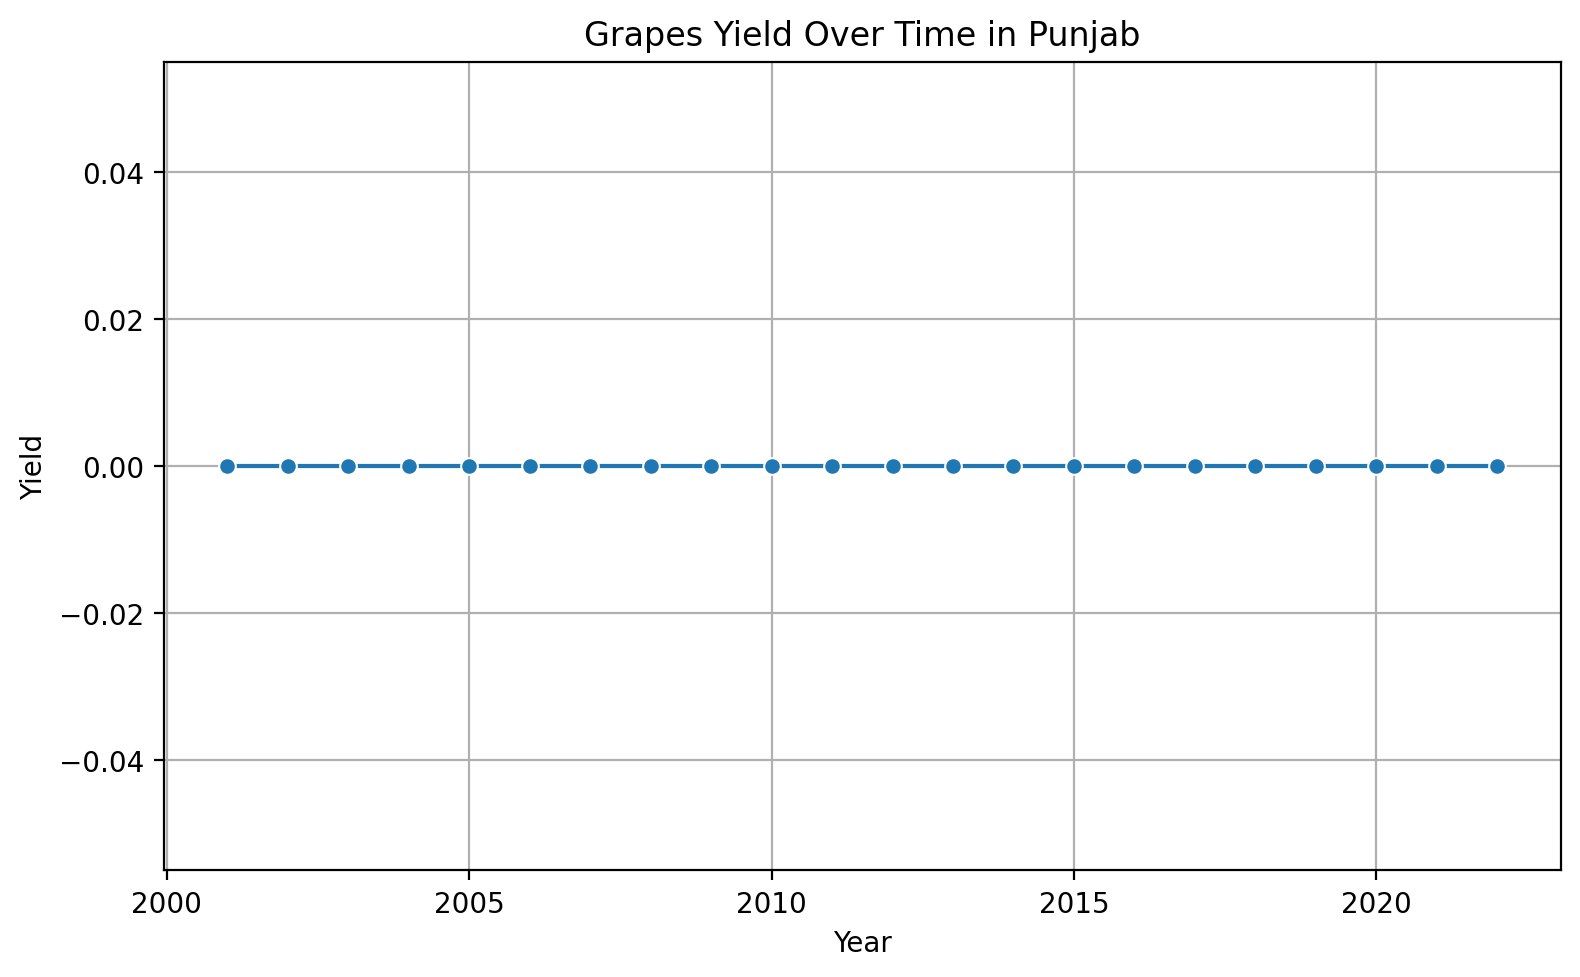

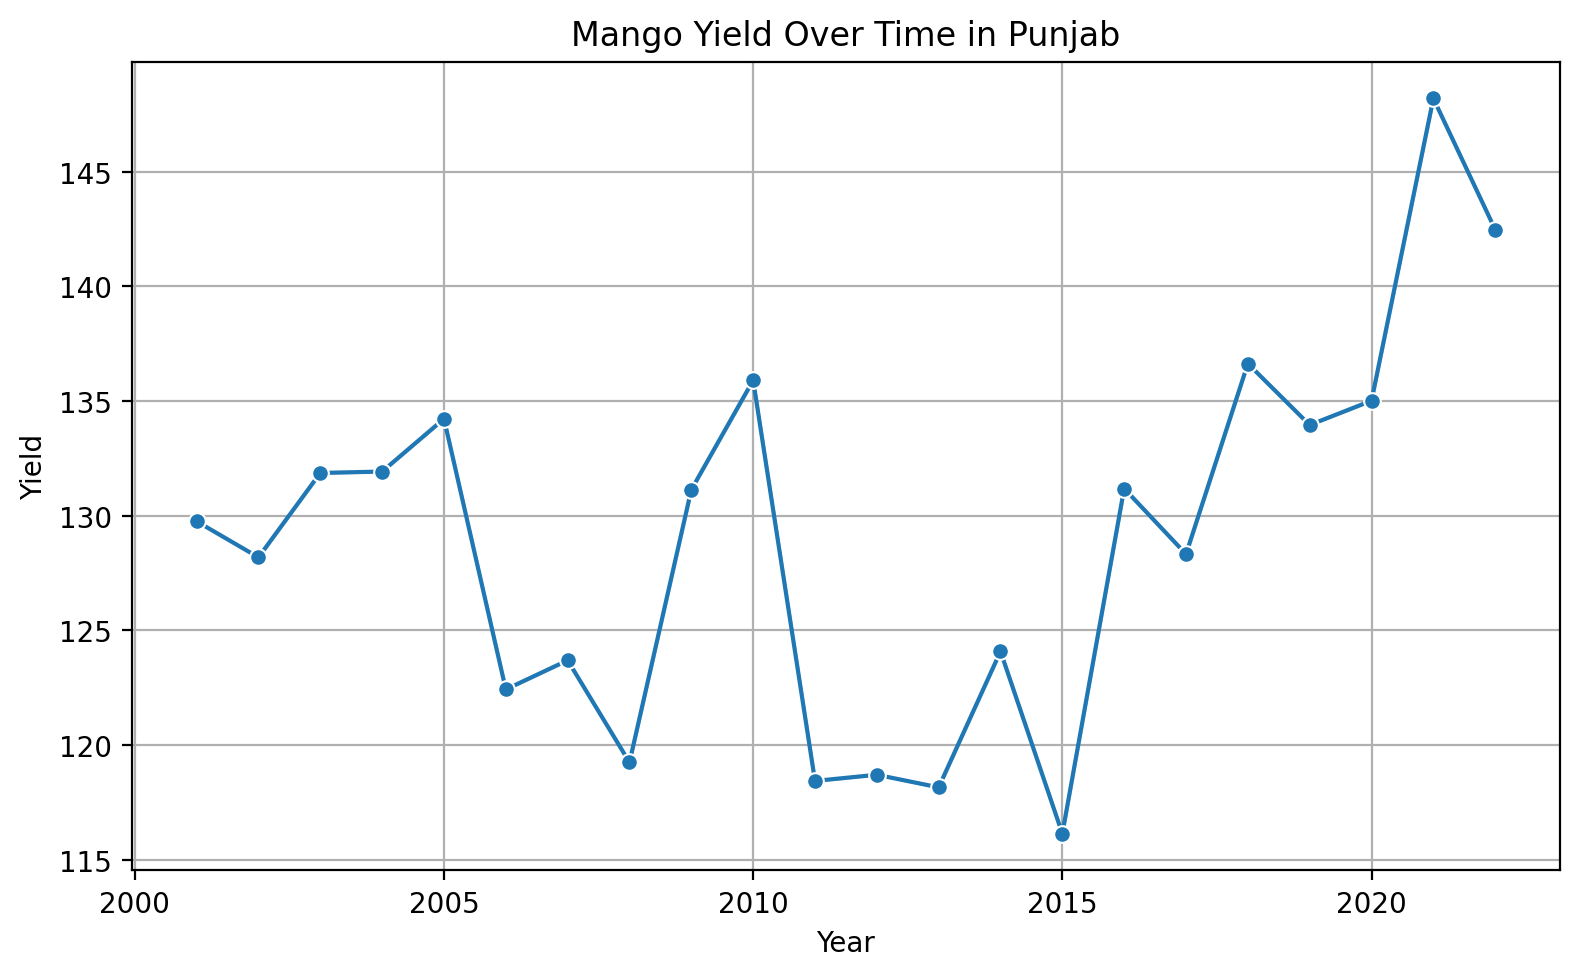

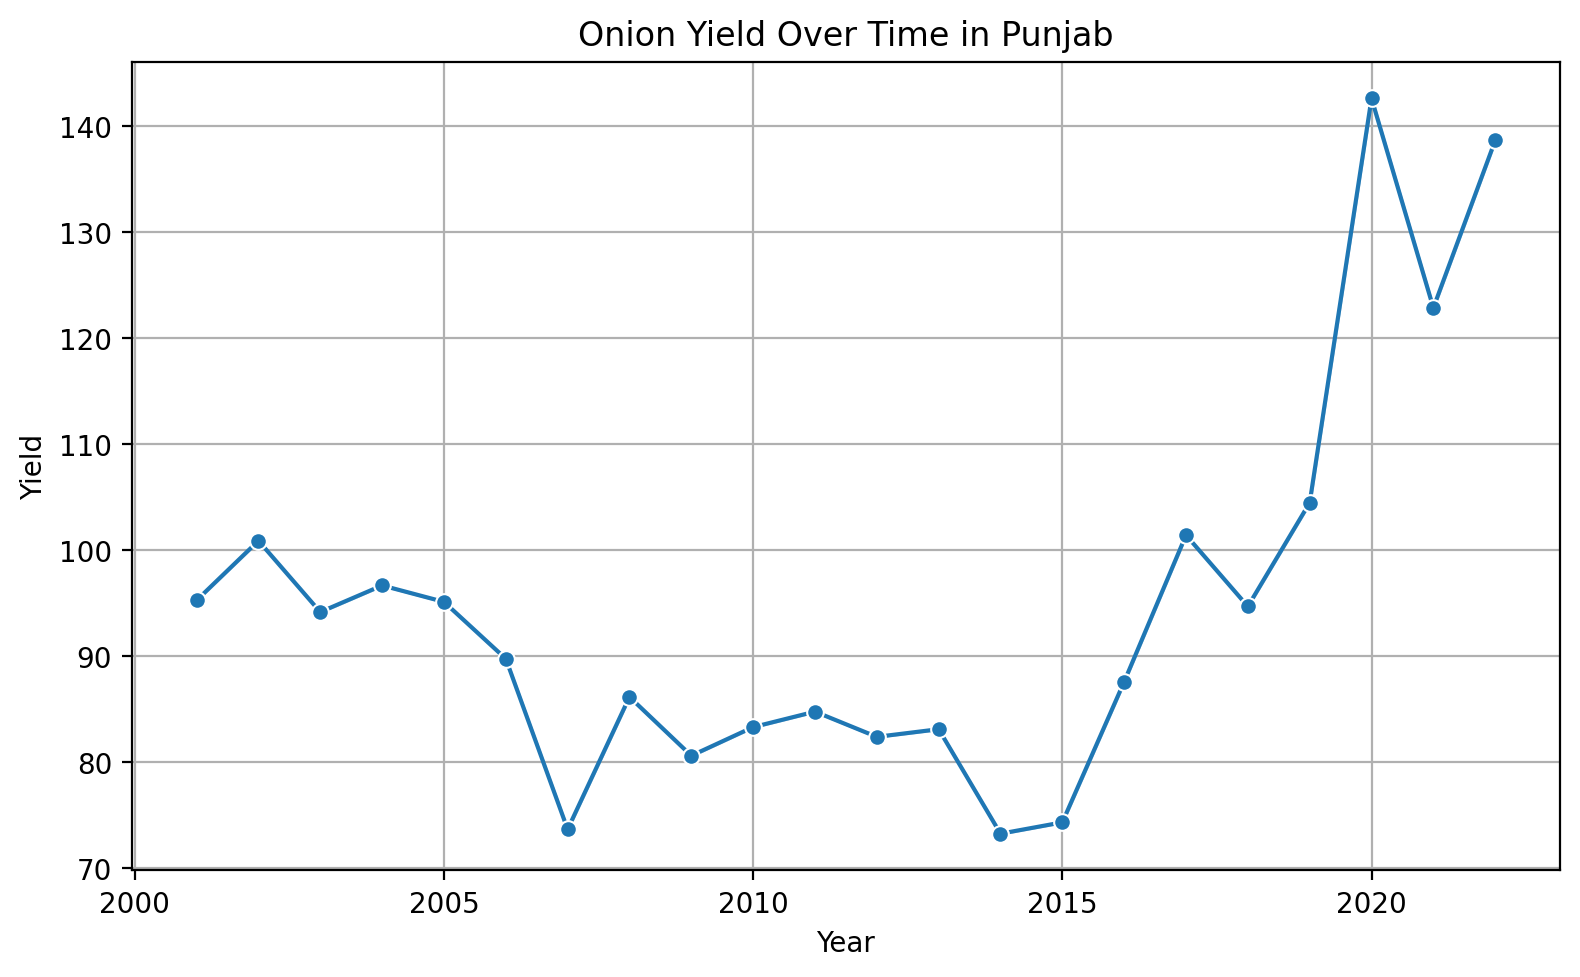

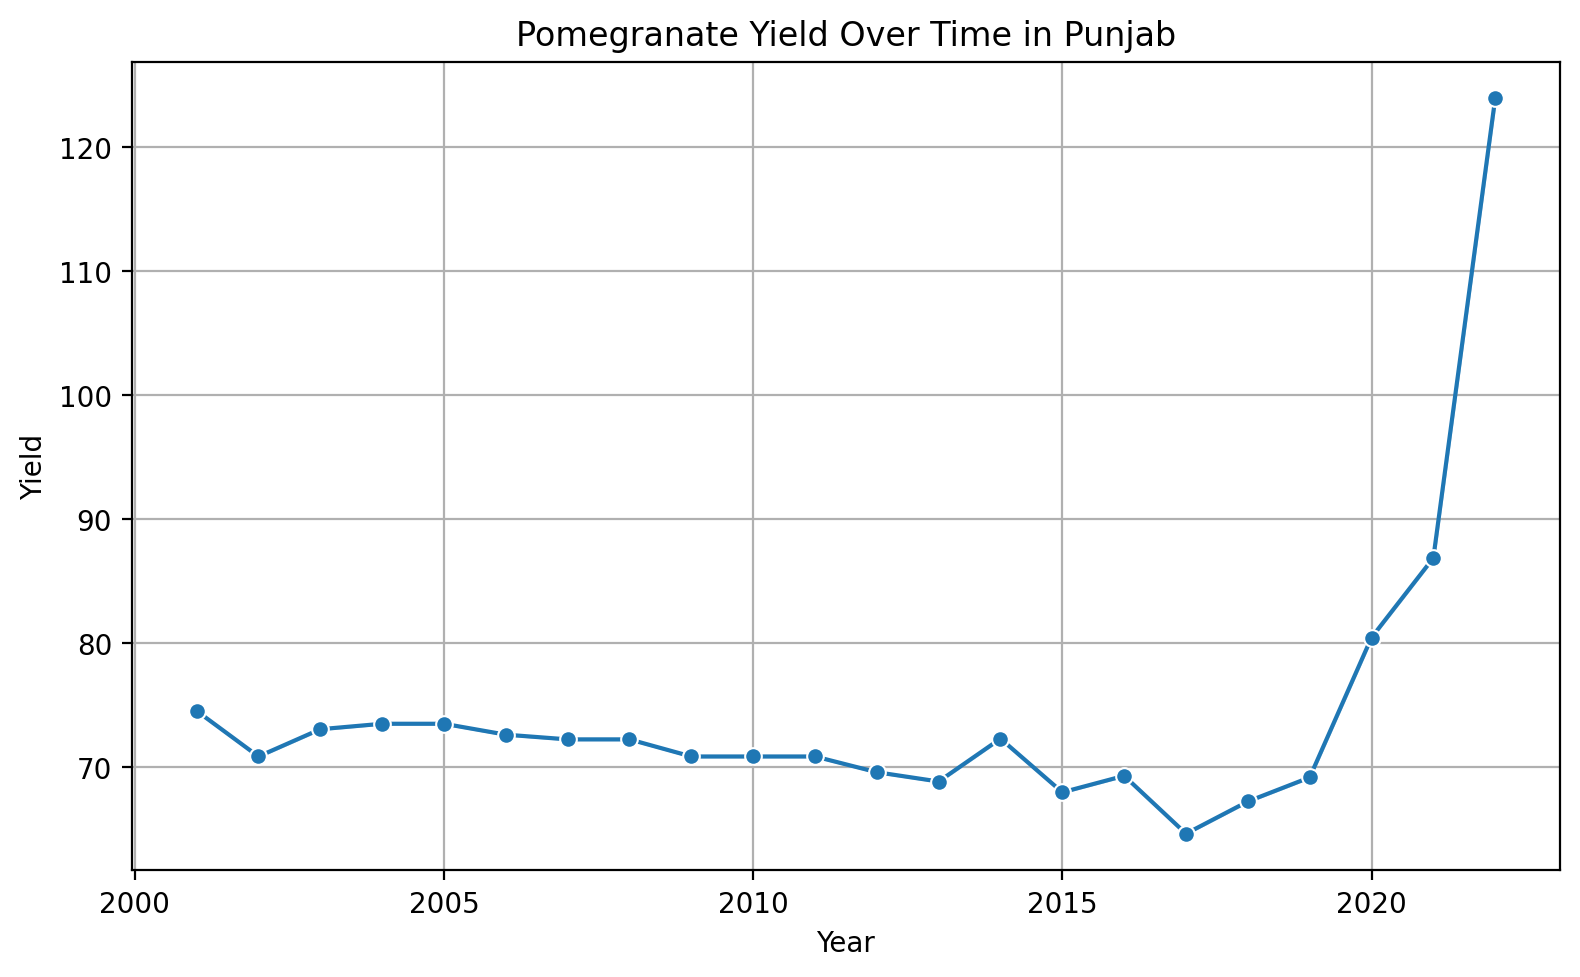

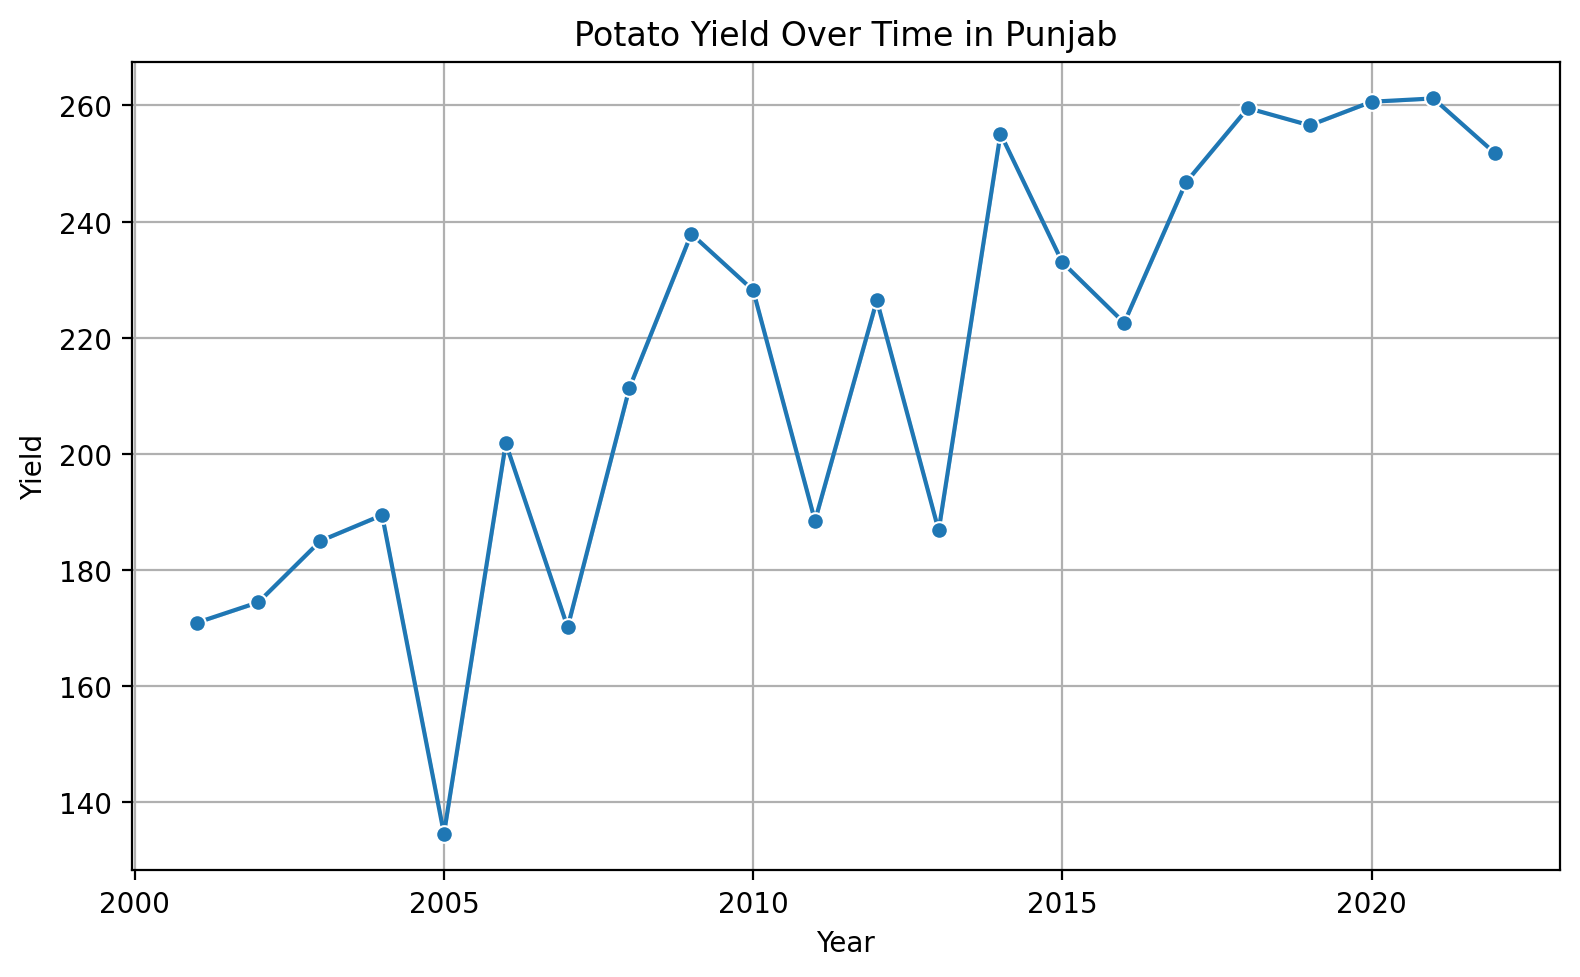

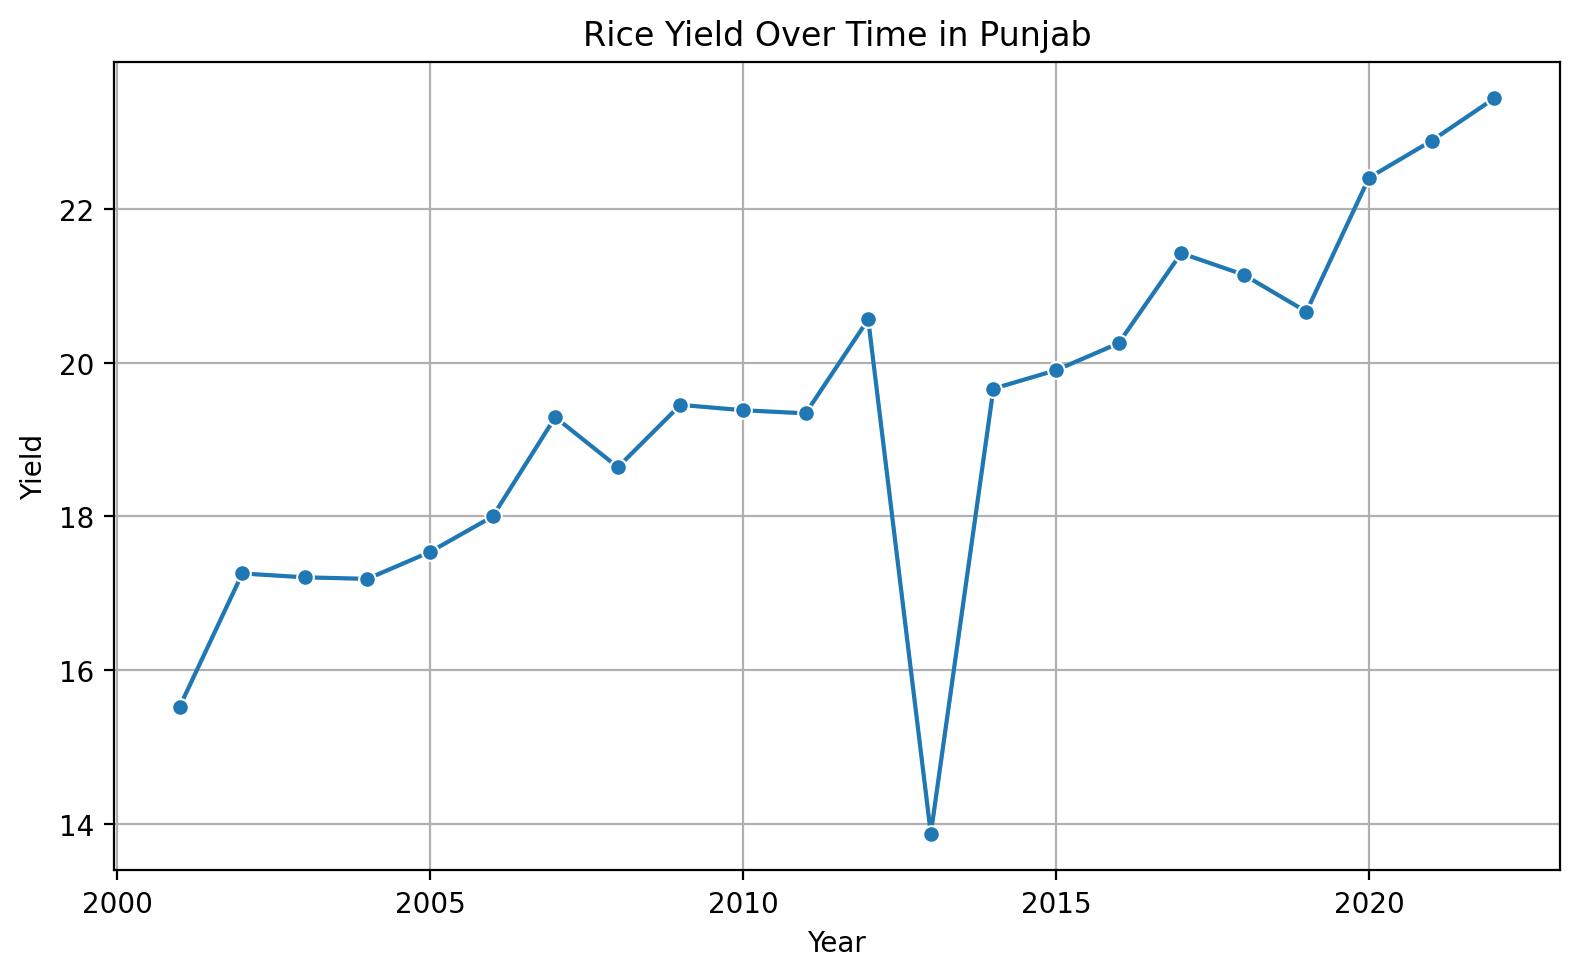

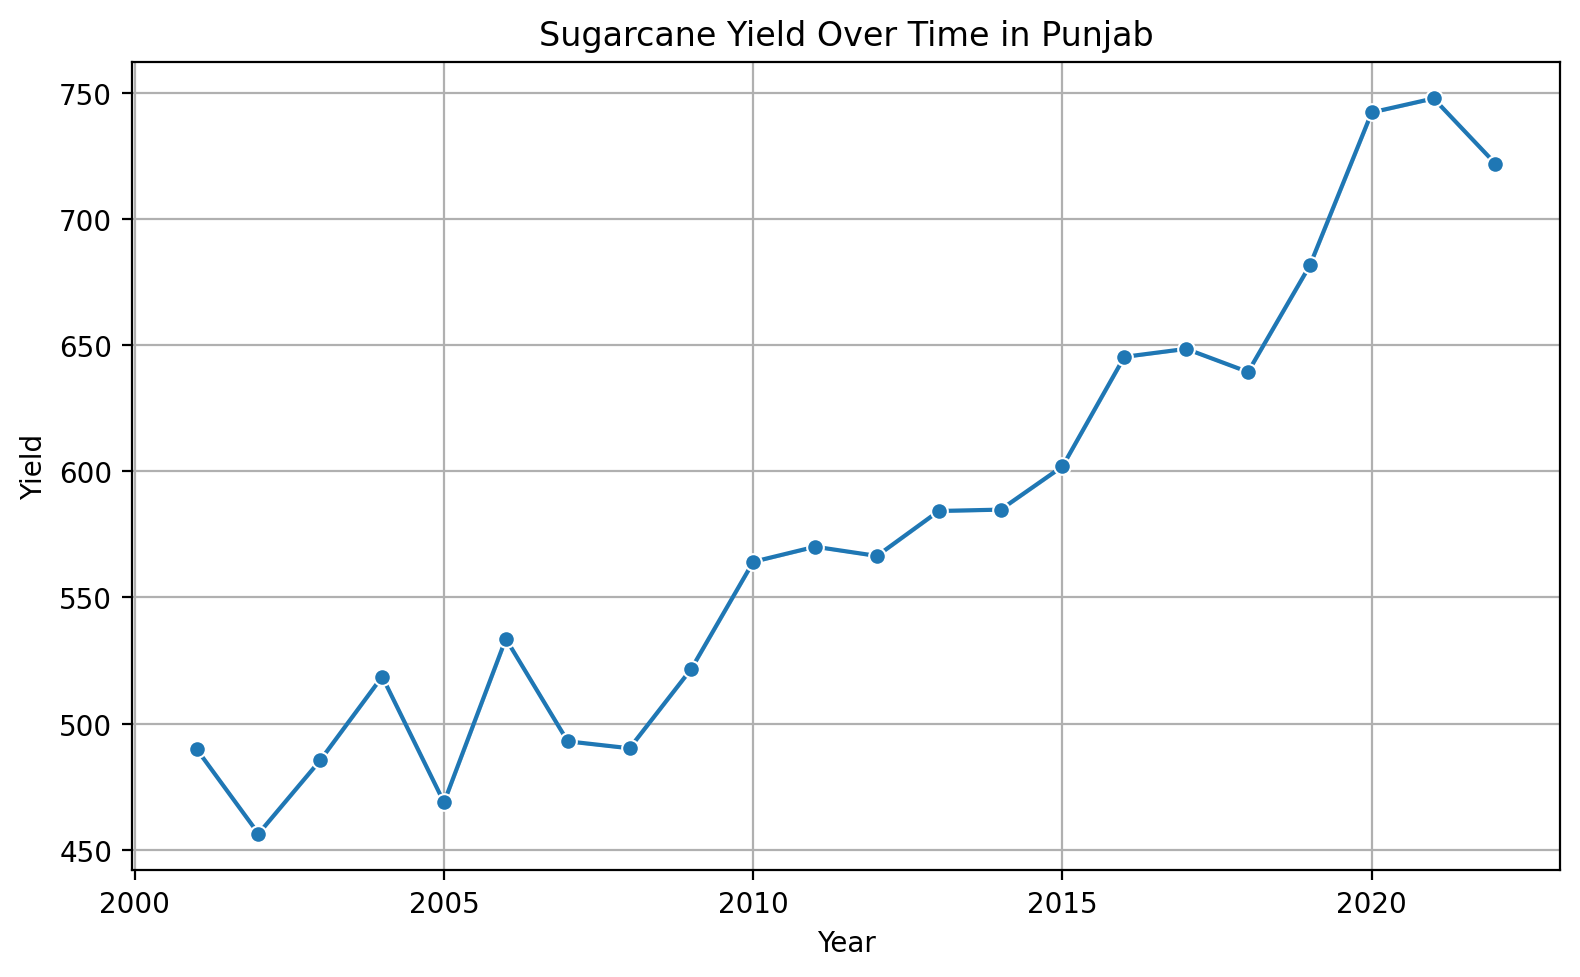

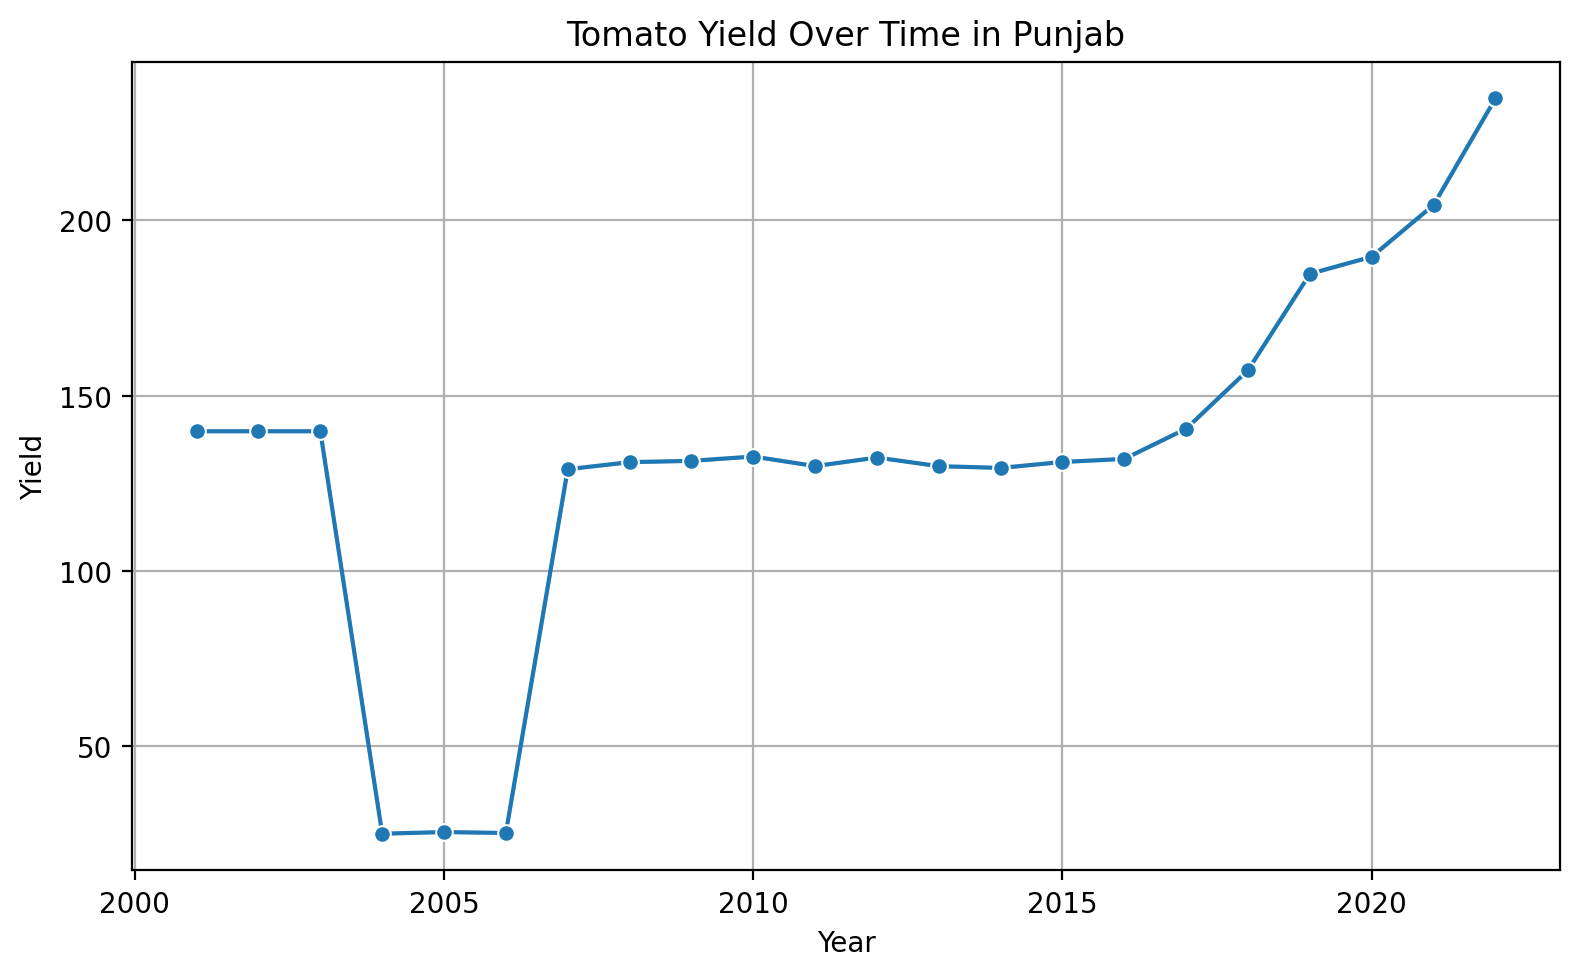

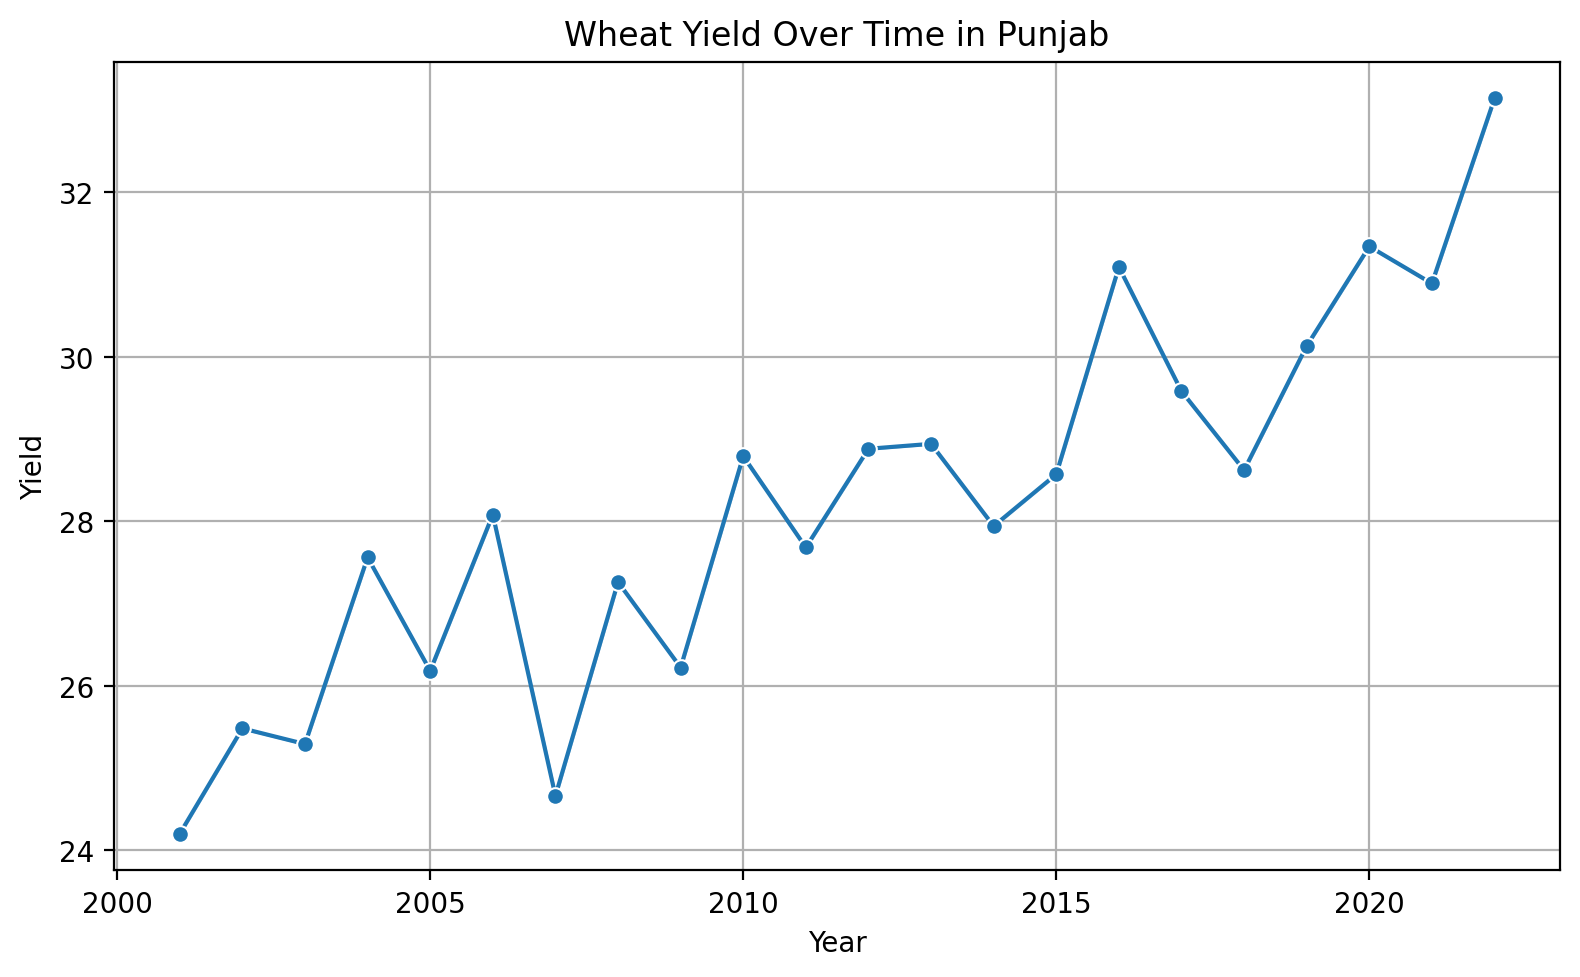

In [36]:
crop_list = [
    "apple", "banana", "cotton", "dates", "grapes", "mango",
    "onion", "pomegranate", "potato", "rice", "sugarcane",
    "tomato", "wheat"
]

province_name = "Punjab"

# Loop through each crop and plot yield over time
for crop_name in crop_list:
    filtered = merged_df[
        (merged_df["Crop"] == crop_name) & 
        (merged_df["Province"] == province_name)
    ]
    
    if not filtered.empty:
        plt.figure(figsize=(8, 5))
        sns.lineplot(data=filtered, x="Year", y="Yield", marker="o")
        plt.title(f"{crop_name.title()} Yield Over Time in {province_name}")
        plt.xlabel("Year")
        plt.ylabel("Yield")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for {crop_name.title()} in {province_name}.")


#### Province-wise Correlation Heatmap (with Climate Variables)

C:\Users\mabd0\AppData\Local\Temp\ipykernel_13992\3552247206.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mabd0\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


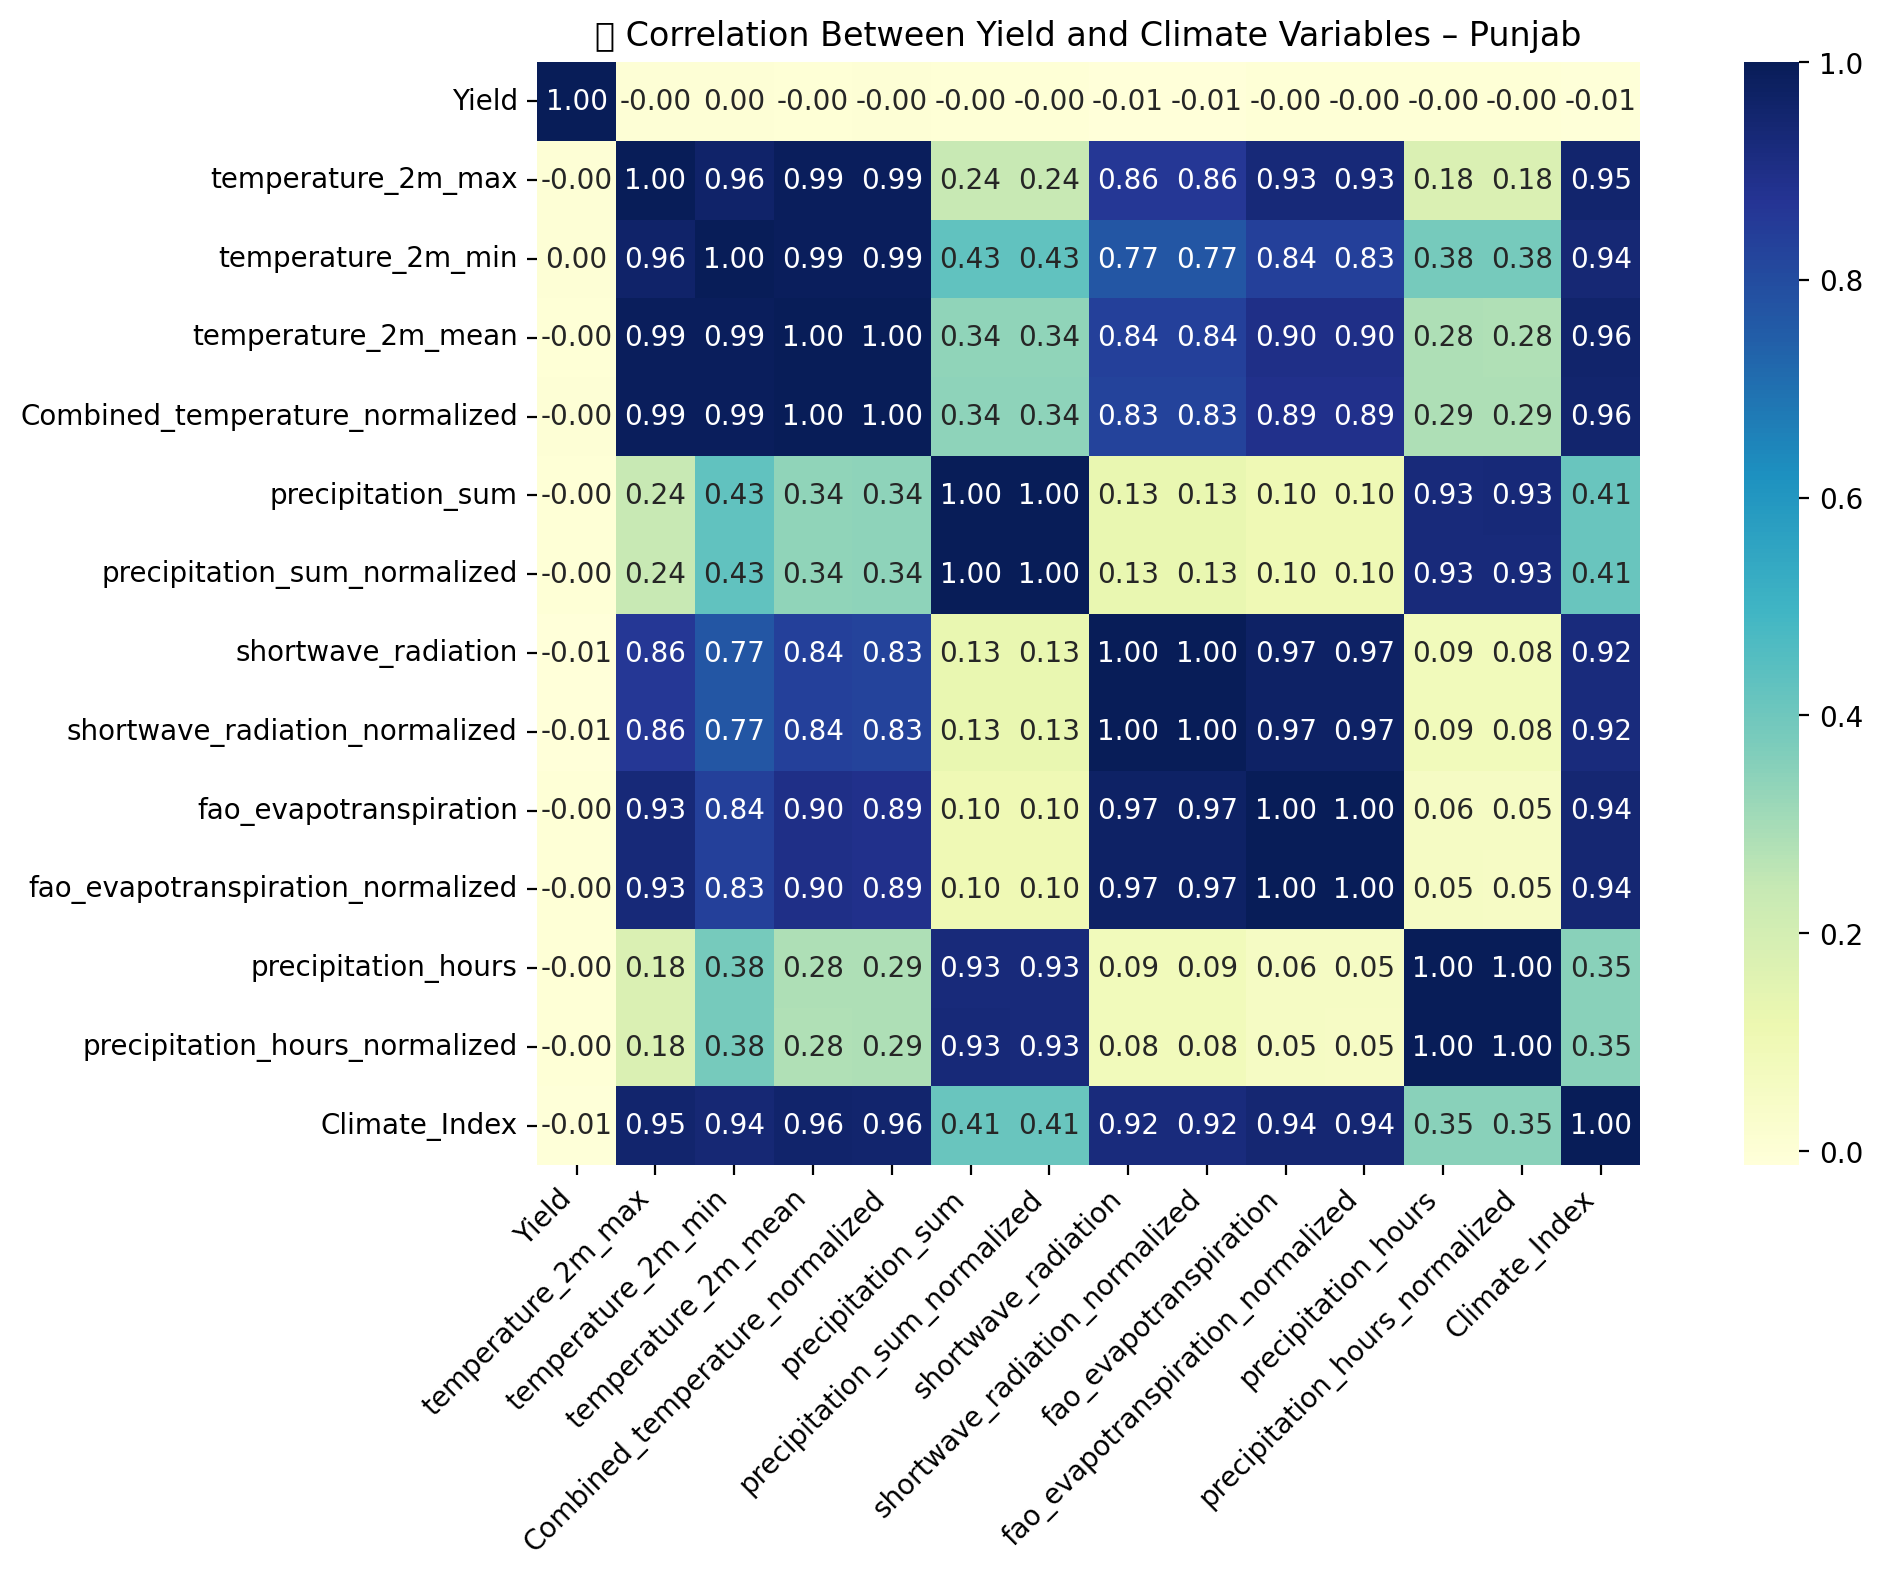

C:\Users\mabd0\AppData\Local\Temp\ipykernel_13992\3552247206.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mabd0\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


C:\Users\mabd0\AppData\Local\Temp\ipykernel_13992\3552247206.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mabd0\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


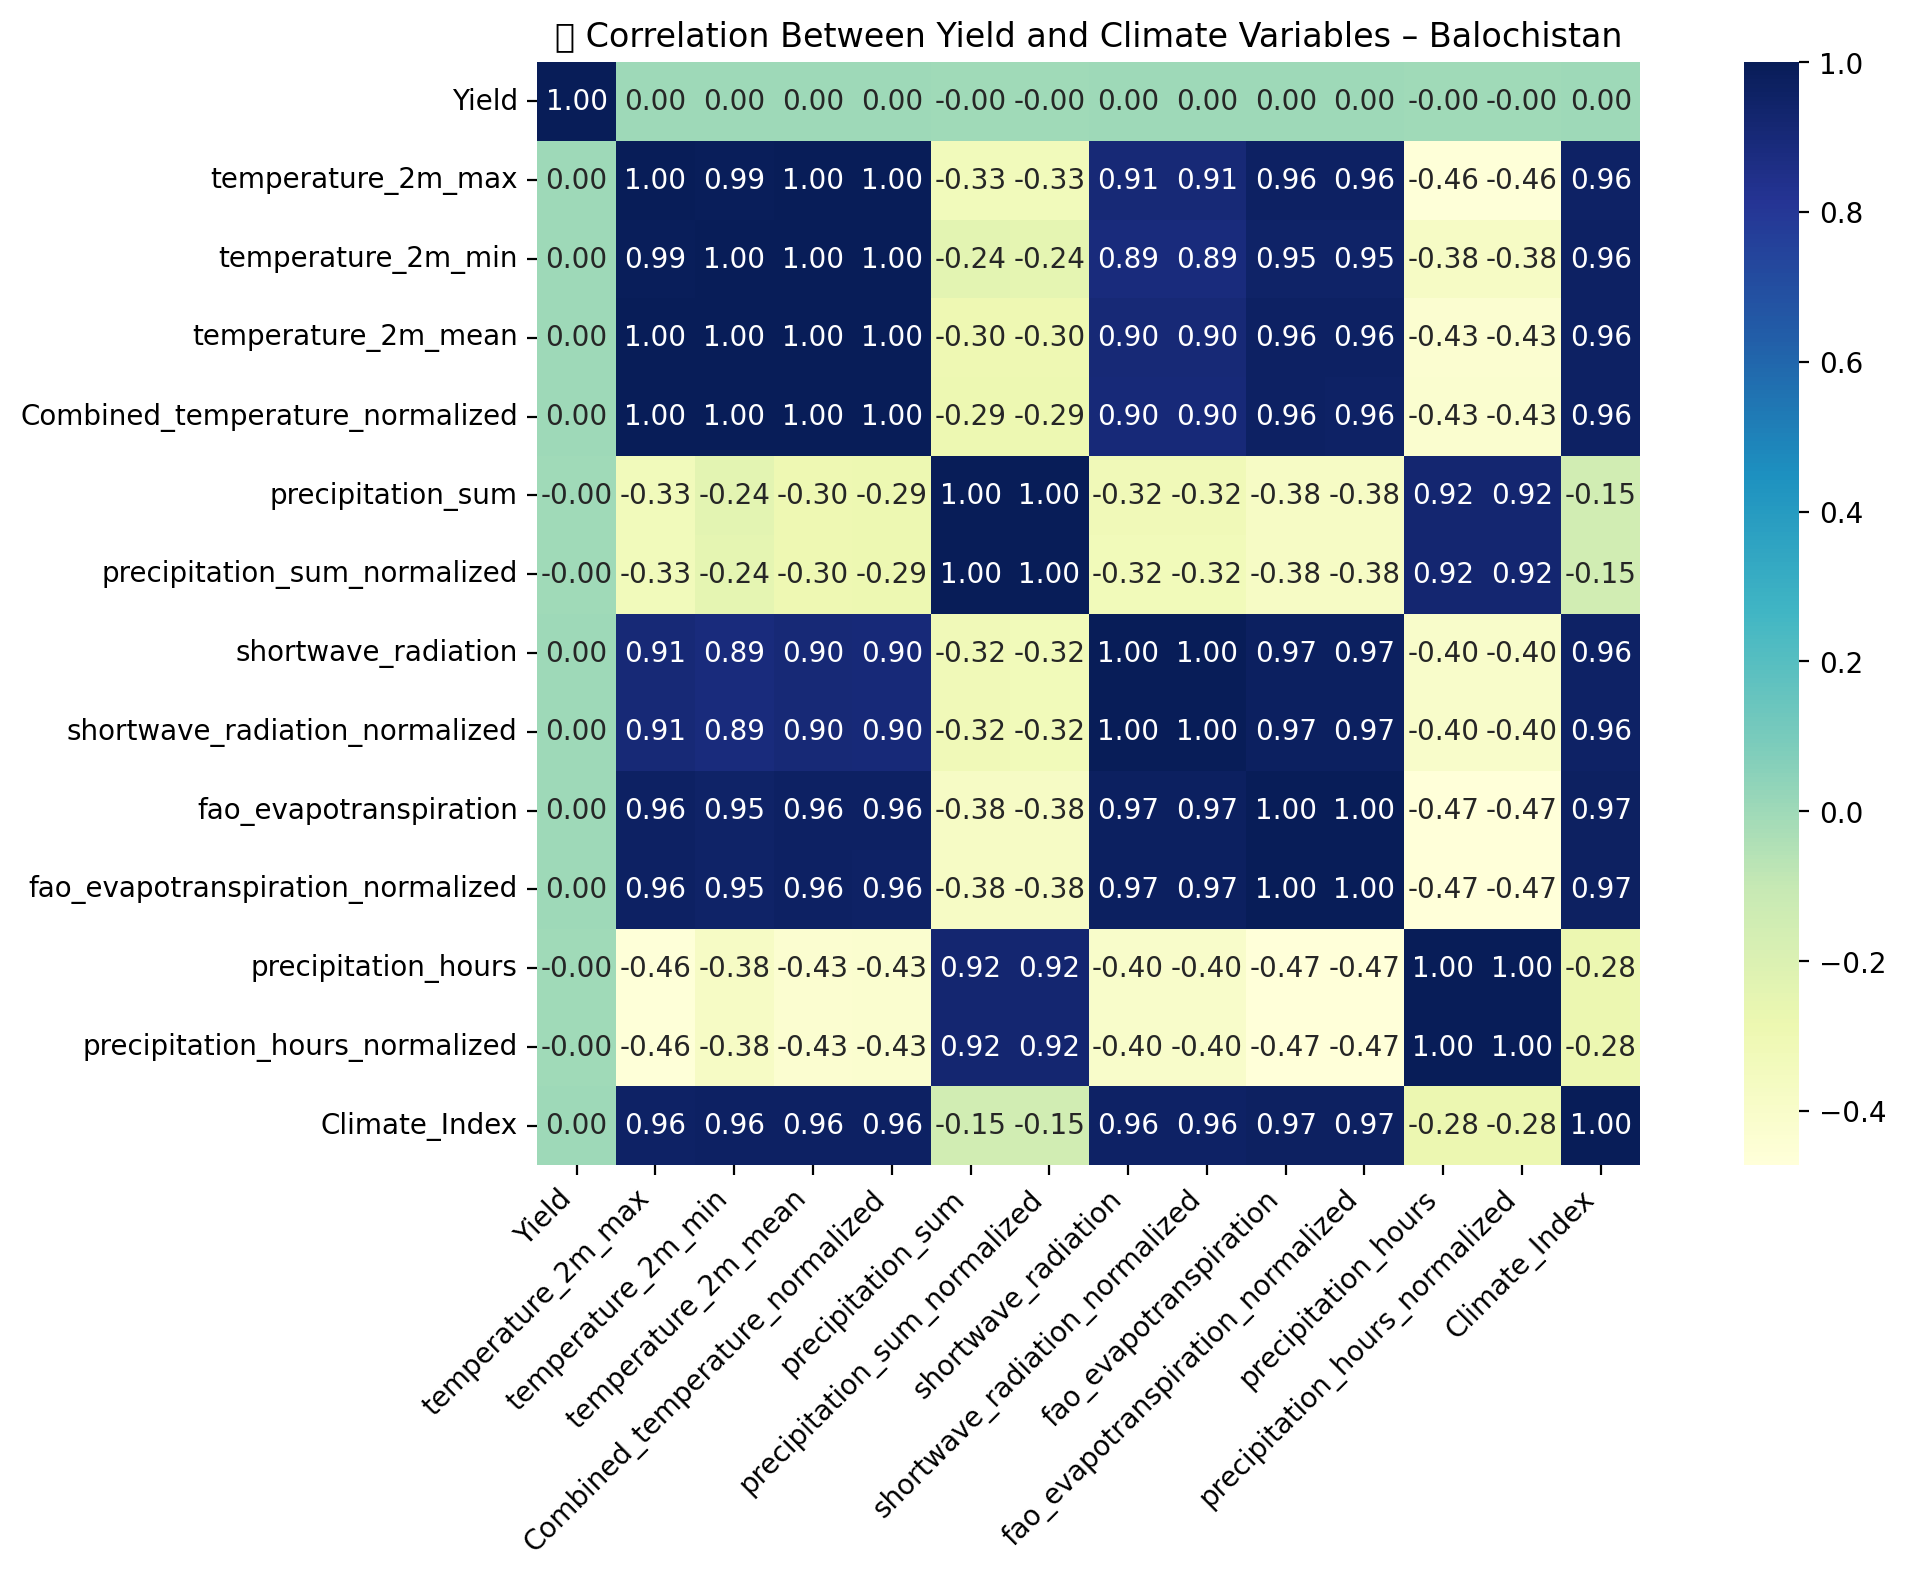

In [37]:
# Only use columns that exist in merged_df
available_climate_vars = [col for col in climate_vars if col in merged_df.columns]

for province in merged_df["Province"].unique():
    province_df = merged_df[merged_df["Province"] == province]

    # Select only Yield and available climate variables
    subset = province_df[["Yield"] + available_climate_vars]

    # Calculate correlation
    corr = subset.corr()

    # Plot
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", square=True)
    plt.title(f"📊 Correlation Between Yield and Climate Variables – {province}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

C:\Users\mabd0\AppData\Local\Temp\ipykernel_13992\3275411777.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mabd0\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


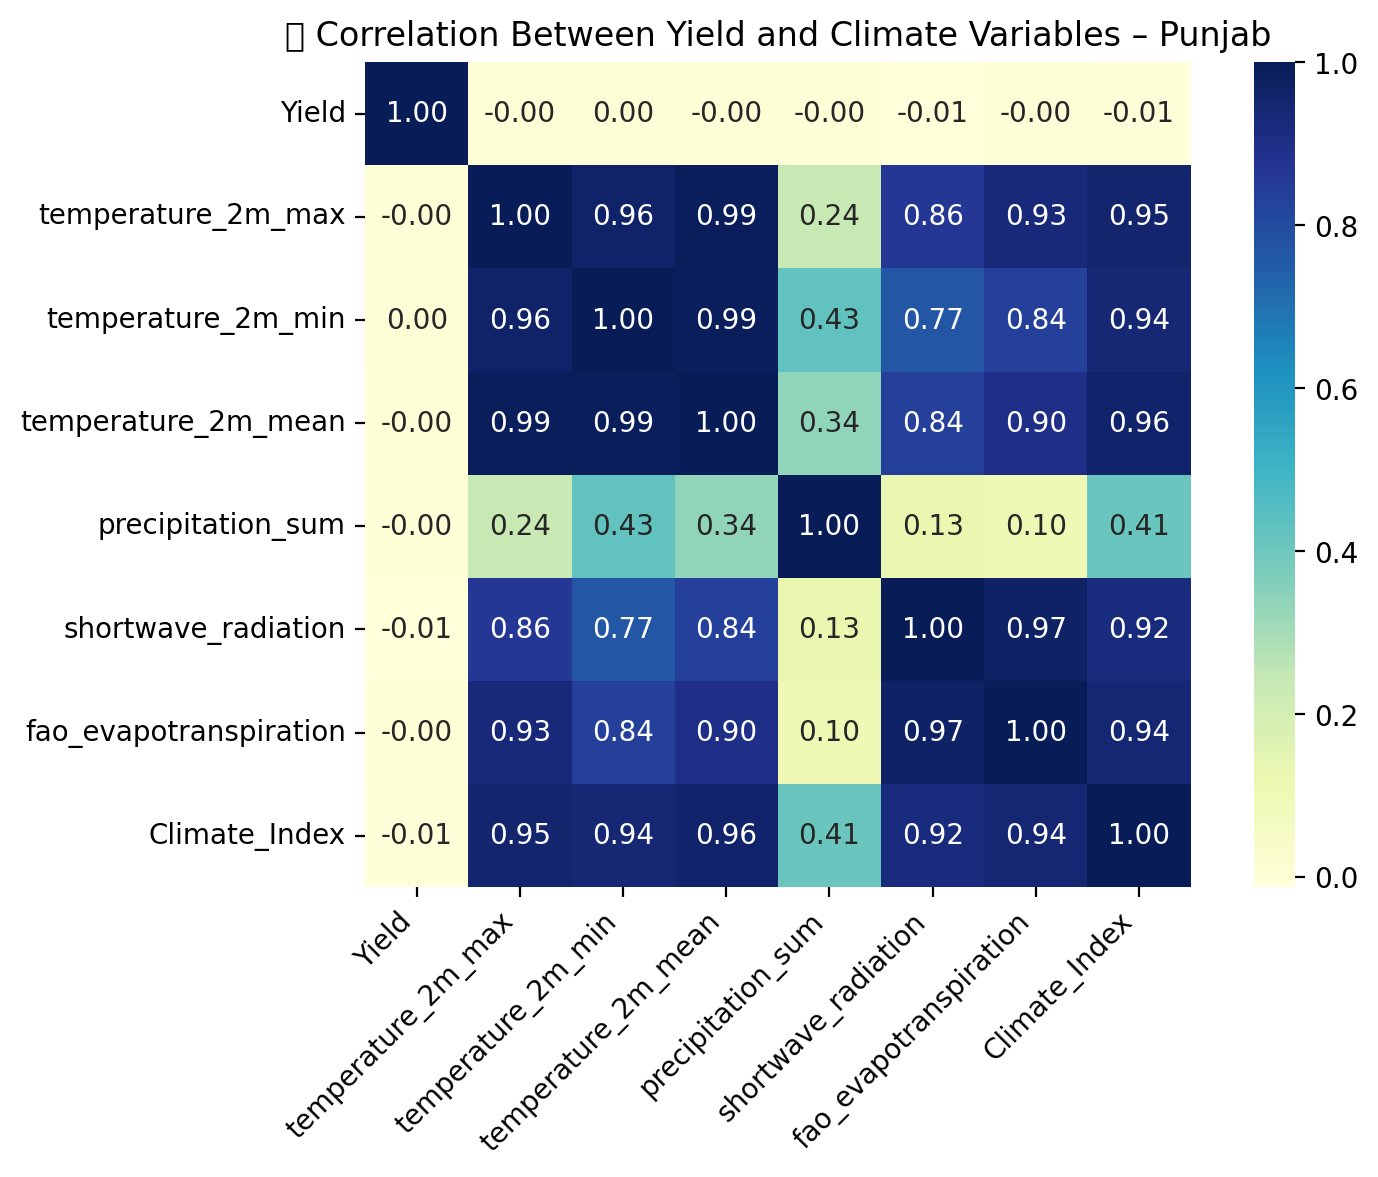

C:\Users\mabd0\AppData\Local\Temp\ipykernel_13992\3275411777.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mabd0\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


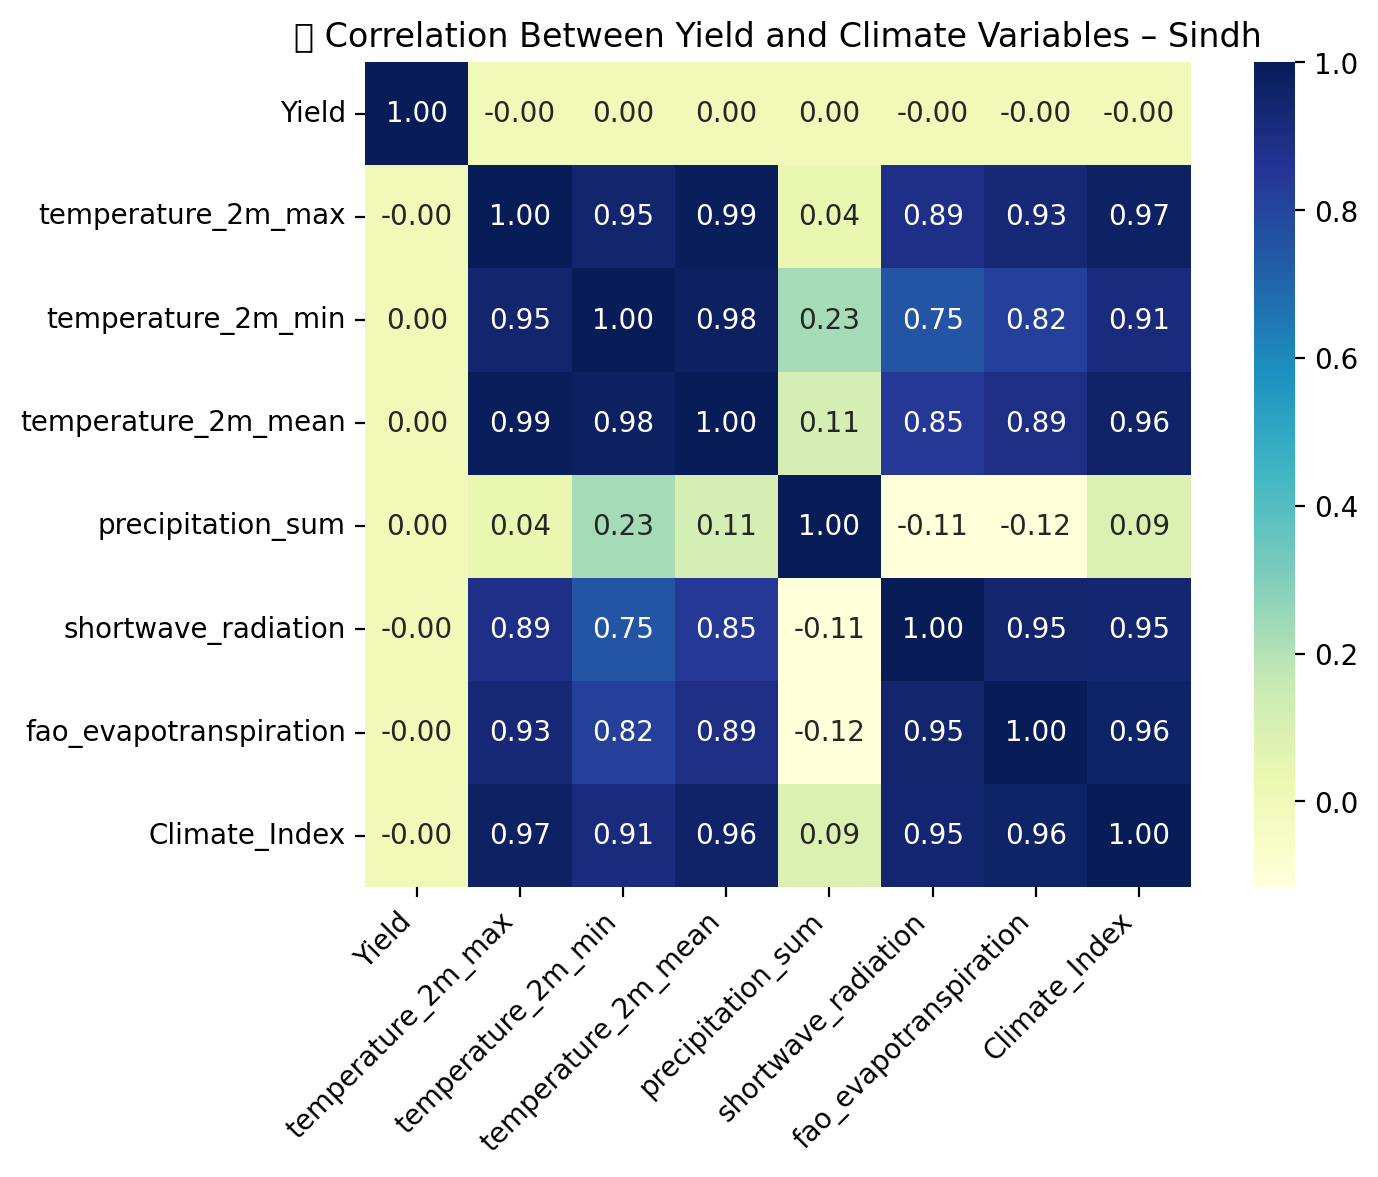

c:\Users\mabd0\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mabd0\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\mabd0\AppData\Local\Temp\ipykernel_13992\3275411777.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mabd0\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


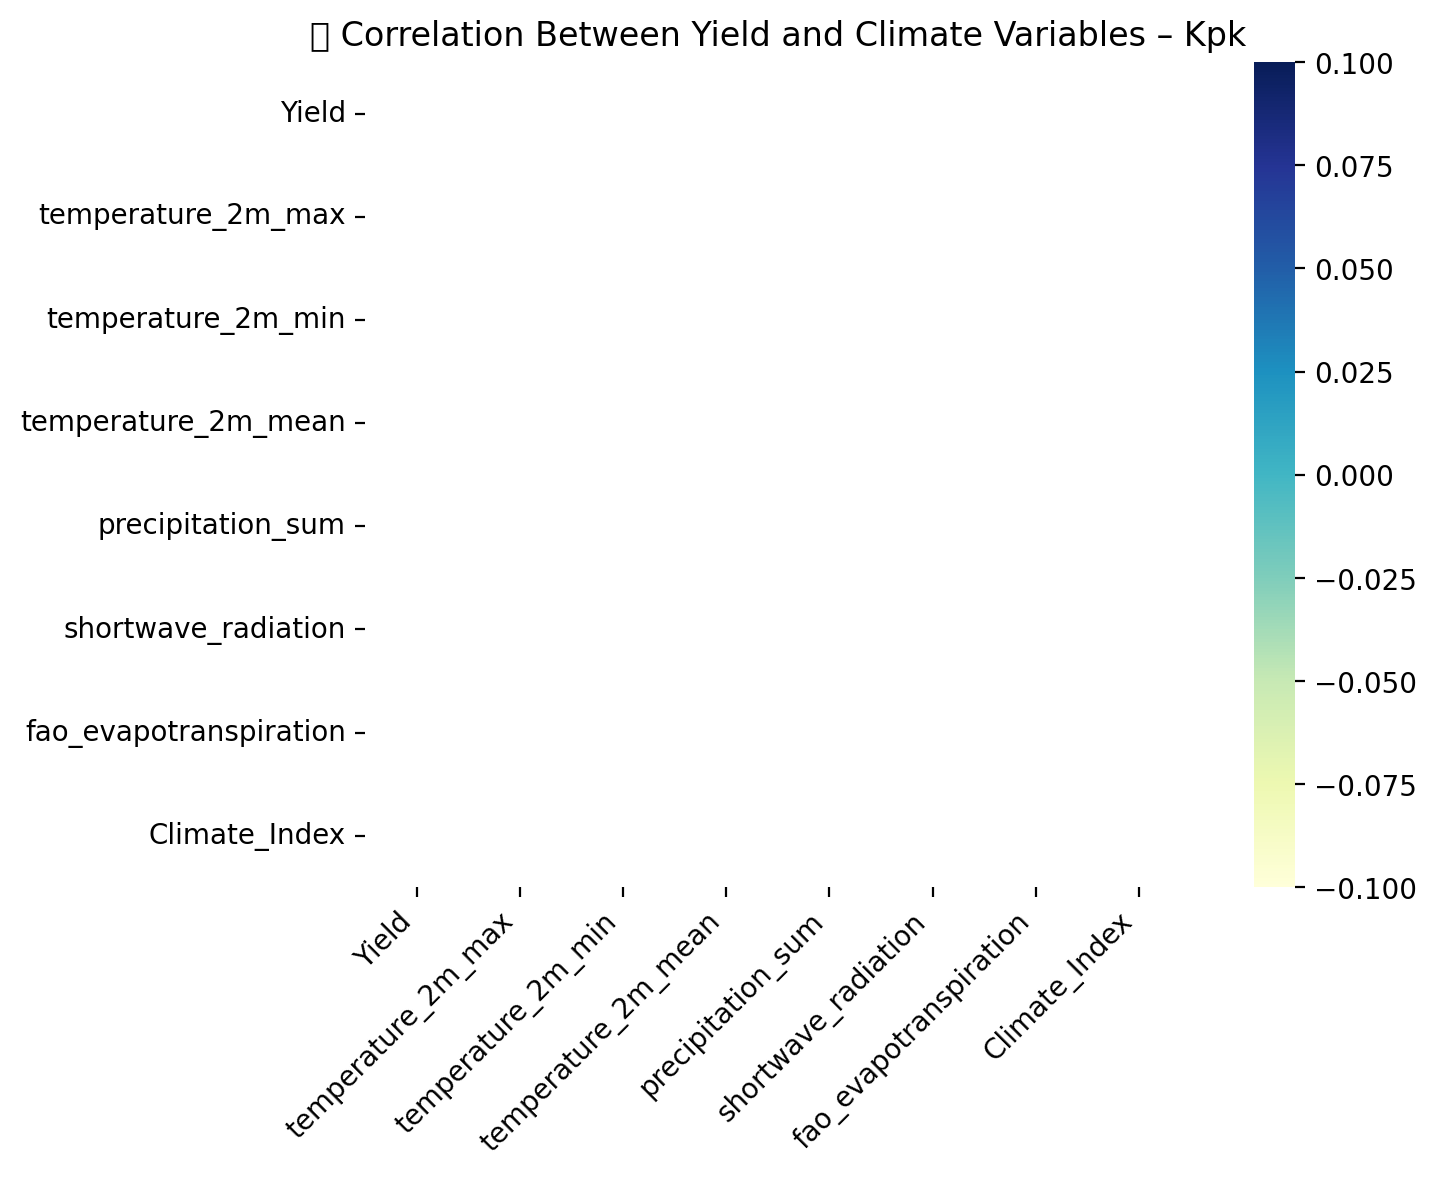

C:\Users\mabd0\AppData\Local\Temp\ipykernel_13992\3275411777.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mabd0\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


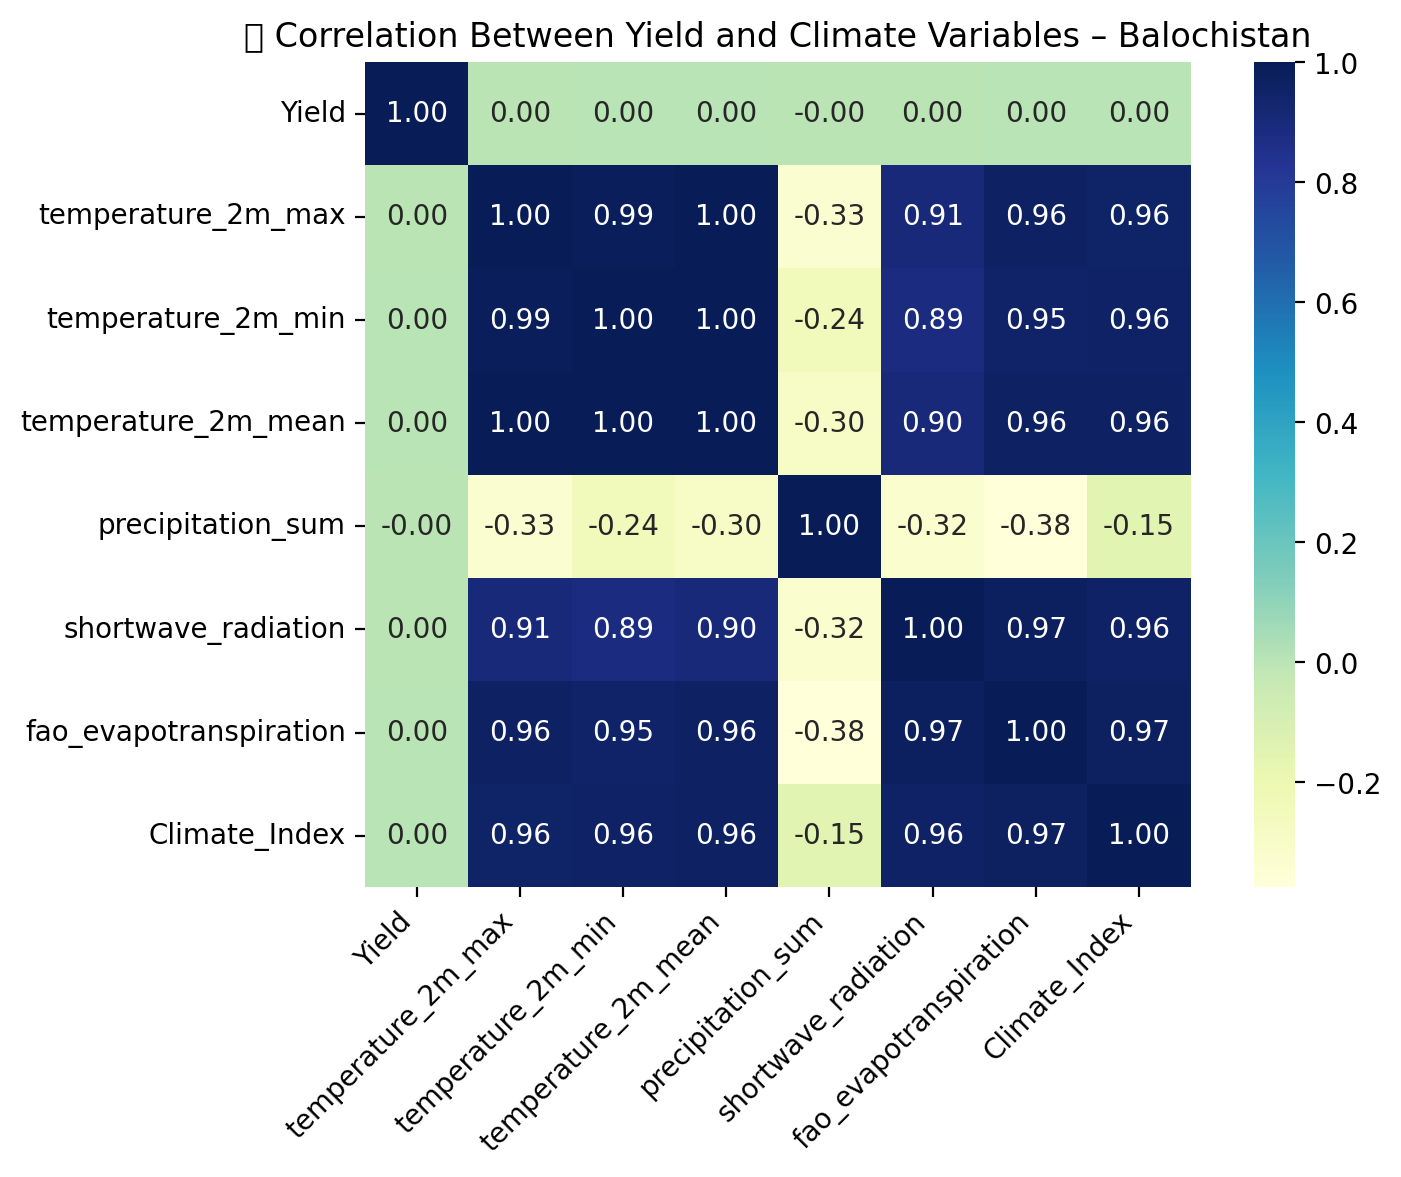

✅ Merged dataset shape: (10296, 19)
   Year   Crop  Area  Production  Yield Province  temperature_2m_max  \
0  2001  apple  0.74         2.5  84.31   Punjab               18.90   
1  2001  apple  0.74         2.5  84.31   Punjab               23.70   
2  2001  apple  0.74         2.5  84.31   Punjab               29.03   
3  2001  apple  0.74         2.5  84.31   Punjab               34.33   
4  2001  apple  0.74         2.5  84.31   Punjab               41.20   

   temperature_2m_min  temperature_2m_mean  Combined_temperature_normalized  \
0                6.08                12.26                             0.08   
1                9.05                16.19                             0.23   
2               14.49                21.77                             0.45   
3               20.14                27.34                             0.67   
4               27.17                34.25                             0.94   

   precipitation_sum  precipitation_sum_normalized  shor

In [38]:
# --- Step 4: Generate correlation heatmap for each province ---
selected_columns = [
    "Yield",
    "temperature_2m_max",
    "temperature_2m_min",
    "temperature_2m_mean",
    "precipitation_sum",
    "shortwave_radiation",
    "fao_evapotranspiration",
    "Climate_Index"
]

for province in provinces:
    subset = merged_df[merged_df["Province"] == province]
    subset = subset[selected_columns].copy()

    corr = subset.corr(numeric_only=True)

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", square=True)
    plt.title(f"📊 Correlation Between Yield and Climate Variables – {province}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Optional: inspect the merged data
print("✅ Merged dataset shape:", merged_df.shape)
print(merged_df.head())

In [39]:
corr_sorted = corr["Yield"].sort_values(ascending=False)
print(f"Top correlations with Yield in {province}:\n{corr_sorted}\n")


Top correlations with Yield in Balochistan:
Yield                     1.000000
fao_evapotranspiration    0.003467
temperature_2m_min        0.002879
temperature_2m_mean       0.001649
Climate_Index             0.001477
temperature_2m_max        0.000375
shortwave_radiation       0.000159
precipitation_sum        -0.001777
Name: Yield, dtype: float64



#### Crop-wise Correlation of Yield vs Climate

In [54]:
# --- Step 4: Compute correlations for each crop ---
crops = merged_df['Crop'].unique()
crop_correlations = {}

for crop in crops:
    crop_df = merged_df[merged_df['Crop'] == crop]
    
    # Ensure there are enough data points to compute correlation
    if len(crop_df) >= 5:  
        corr_matrix = crop_df[['Yield'] + climate_vars].corr()
        crop_correlations[crop] = corr_matrix['Yield'].sort_values(ascending=False)

# Display top correlations per crop
for crop, corr in crop_correlations.items():
    print(f"\n=== 📈 Correlation for Crop: {crop} ===")
    print(corr.head(8))

# Optional: inspect the merged data
print("\n✅ Merged dataset shape:", merged_df.shape)
print(merged_df.head())


=== 📈 Correlation for Crop: apple ===
Yield                                1.000000
precipitation_sum_normalized         0.255388
precipitation_hours_normalized       0.240035
precipitation_hours                  0.232496
precipitation_sum                    0.107570
Climate_Index                        0.069273
fao_evapotranspiration_normalized    0.048765
shortwave_radiation_normalized       0.030496
Name: Yield, dtype: float64

=== 📈 Correlation for Crop: banana ===
Yield                                1.000000
precipitation_sum_normalized         0.094742
precipitation_hours_normalized       0.070259
fao_evapotranspiration_normalized    0.056296
precipitation_hours                  0.039546
Climate_Index                        0.039266
shortwave_radiation                  0.025686
shortwave_radiation_normalized       0.011450
Name: Yield, dtype: float64

=== 📈 Correlation for Crop: cotton ===
Yield                              1.000000
temperature_2m_max                 0.361782
t

#### Top correlations with Yield

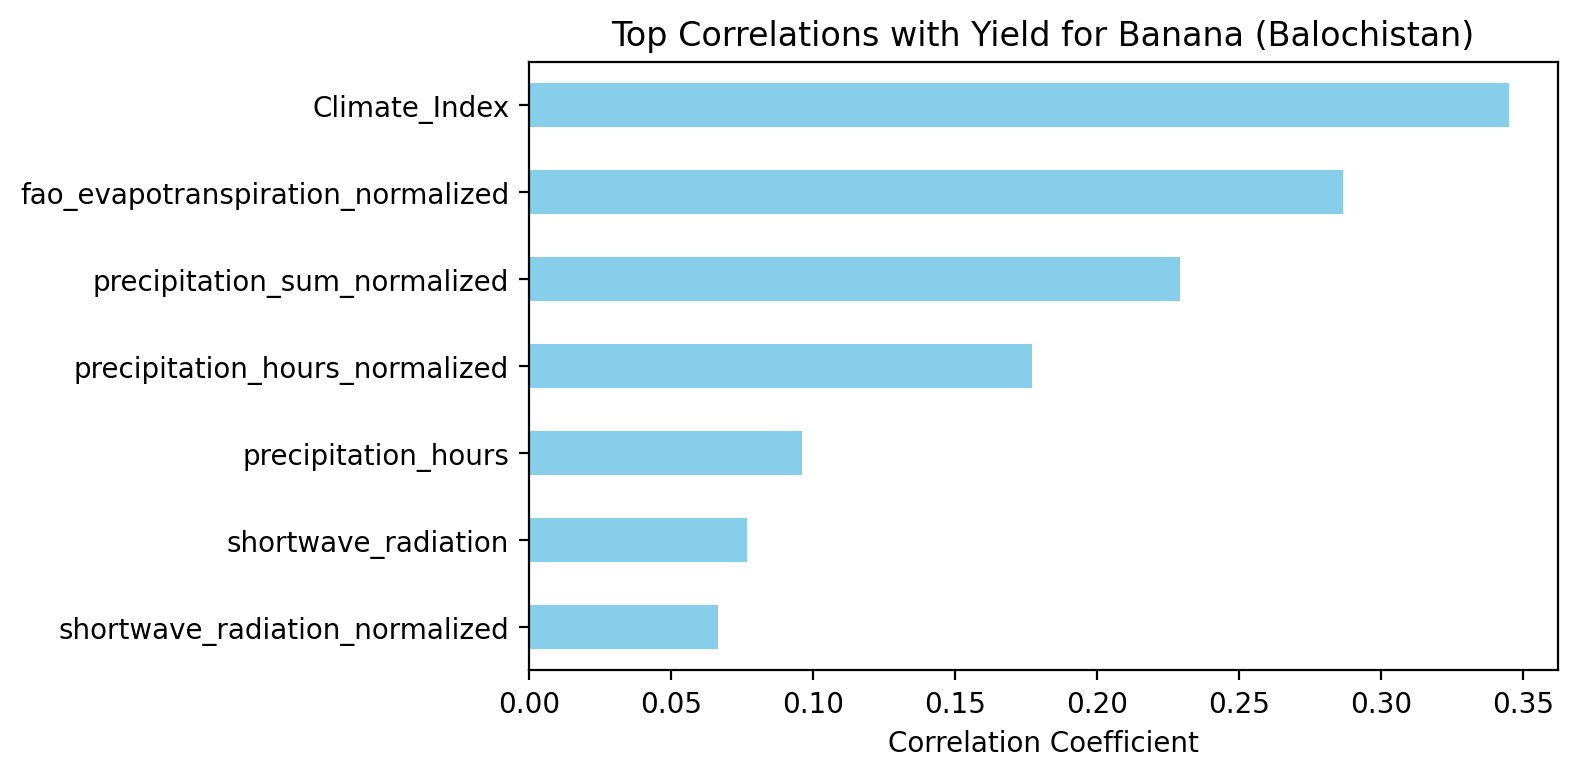

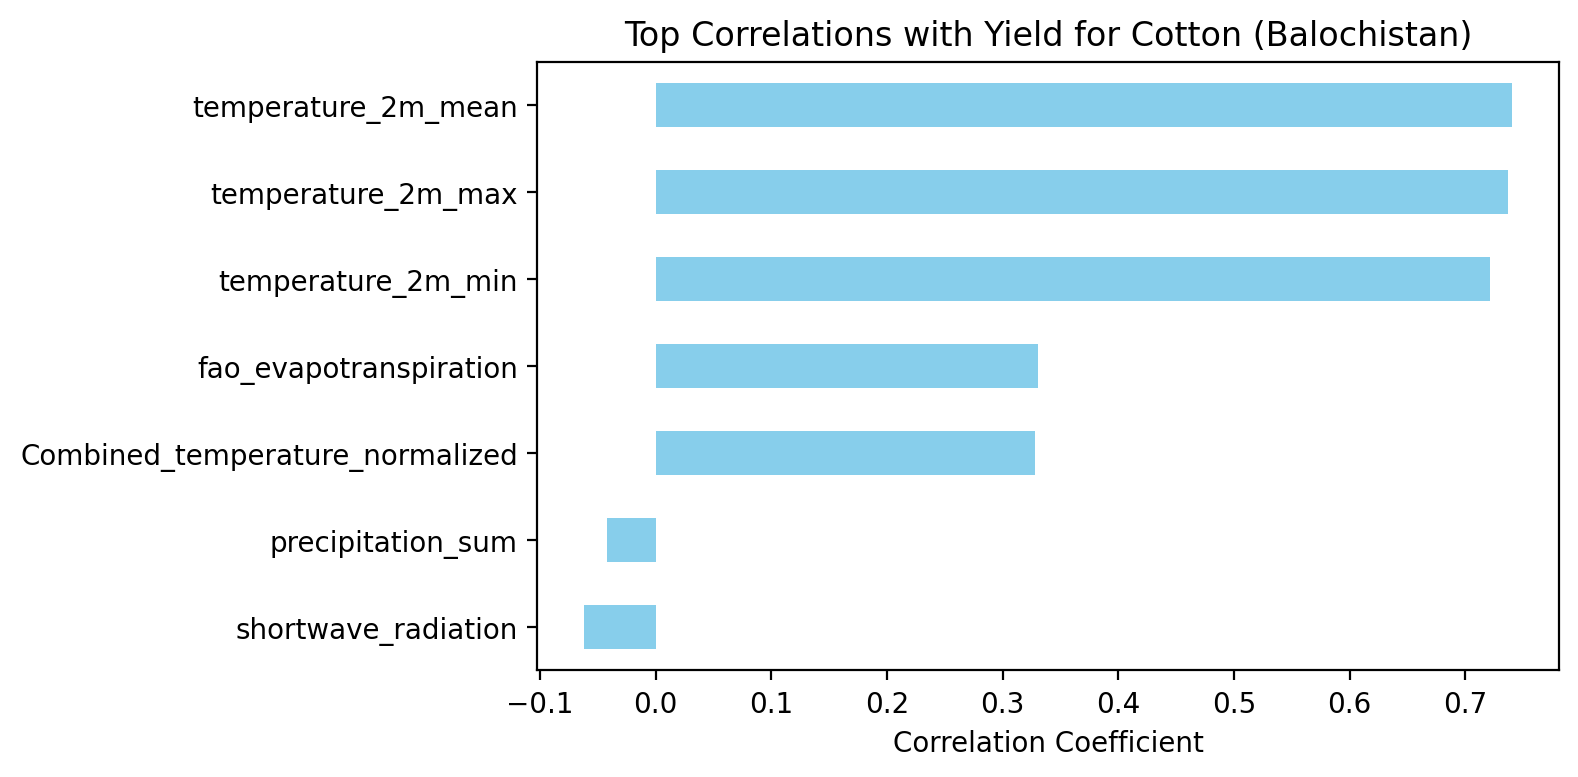

In [41]:
correlations = {
    "apple": {
        "precipitation_sum_normalized": 0.618253,
        "Climate_Index": 0.608474,
        "precipitation_hours_normalized": 0.605029,
        "precipitation_hours": 0.564883,
        "precipitation_sum": 0.298905,
        "fao_evapotranspiration_normalized": 0.248372,
        "shortwave_radiation_normalized": 0.177361,
    },
    "banana": {
        "Climate_Index": 0.344898,
        "fao_evapotranspiration_normalized": 0.286727,
        "precipitation_sum_normalized": 0.229355,
        "precipitation_hours_normalized": 0.177093,
        "precipitation_hours": 0.096082,
        "shortwave_radiation": 0.076811,
        "shortwave_radiation_normalized": 0.066591,
    },
    "cotton": {
        "temperature_2m_mean": 0.740598,
        "temperature_2m_max": 0.737051,
        "temperature_2m_min": 0.721051,
        "fao_evapotranspiration": 0.330712,
        "Combined_temperature_normalized": 0.328062,
        "precipitation_sum": -0.041791,
        "shortwave_radiation": -0.062353,
    },
}

# Plot each crop's correlation bar chart
for crop, corr_dict in correlations.items():
    plt.figure(figsize=(8, 4))
    pd.Series(corr_dict).sort_values().plot(kind='barh', color='skyblue')
    plt.title(f"Top Correlations with Yield for {crop.capitalize()} (Balochistan)")
    plt.xlabel("Correlation Coefficient")
    plt.tight_layout()
    plt.show()


#### XGBoost Regression: Predicting Yield from Climate and Crop Features

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

#### Drop rows with missing Yield values if any

In [43]:
df = merged_df.dropna(subset=["Yield"]).copy()

#### Select target and features

In [44]:
target = "Yield"
categorical_cols = ["Crop", "Province"]
exclude_cols = ["Year", "Yield", "Area", "Production"] 

#### Get all feature columns except excluded and target

In [45]:
feature_cols = [col for col in df.columns if col not in exclude_cols]
X = df[feature_cols]
y = df[target]

#### One-hot encode categorical features

In [46]:
X = pd.get_dummies(X, columns=["Crop", "Province"], drop_first=True)

In [47]:
print(X.dtypes.value_counts())

bool       14
float64    12
int64       1
Name: count, dtype: int64


In [48]:
# Convert boolean columns to int (0/1)
bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

#### Ensure all features are numeric

In [49]:
assert X.select_dtypes(exclude=["number"]).empty, "Non-numeric columns still present"

#### Train-test split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Initialize and train XGBoost regressor

In [51]:

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

####  Predictions and evaluation

In [52]:
y_pred = model.predict(X_test)

print("✅ Model Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


✅ Model Performance:
Mean Absolute Error (MAE): 16.767369810848564
R² Score: 0.9477491206117742


#### Feature importance

In [53]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(20))
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()